<a href="https://colab.research.google.com/github/jungry/Python/blob/main/Forecasting_Passangers_to_Jeju_Airport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Data Analysis Project

# **Forecasting Passangers to Jeju Airport**

Team:
9073820244 Albina Syla,
2022080537 Lydia,
2022084339 Yun Donghyun,
2022016326 Jung Hyunsu





# **0.0 Initialization**




In [ ]:
# Google Mount
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# DATA File paths
# ATTENTION: YOU NEED TO CHANGE THE DIRECTORY TO YOUR OWN FILE POSITION!

weather_data_path = "/content/drive/My Drive/OBS_ASOS_MNH_20241031132201.csv"
add_weather_data_path = "/content/drive/My Drive/OBS_ASOS_MNH_20241214184954.csv"
passenger_data_path = "/content/drive/My Drive/시계열 통계_20241102.xlsx"
esi_data_path = "/content/drive/My Drive/경제심리지수(ESI).xlsx"
gdp_data_path = "/content/drive/My Drive/GDP_excel.xlsx"
add_gdp_data_path = "/content/drive/My Drive/국내총생산 및 경제성장률 (GDP)_20241214151639.xlsx"
japan_travel_data_path = "/content/drive/My Drive/JTM_inbound_20241106eng.xlsx"
export_cvs_path = "/content/drive/My Drive/"

# **0.1 Preparing the Data**


## 0.1.0 Preparing the Weather Data

This weather data is provided by The Korea Meteorological Administration.
It contains a lot of datapoints about the weather in Jeju.
Here we prepare the data to fit an appropriate format and translate the Korean Headers to English.

In [ ]:
#PREPARING WEATHER DATA

# if necessary please install translation package:
!pip install deep-translator
from deep_translator import GoogleTranslator as translator

# Load Weather data
weather_df = pd.read_csv(weather_data_path, encoding='cp949')
add_weather_df = pd.read_csv(add_weather_data_path, encoding='cp949')

# Combine datasets
weather_df = pd.concat([weather_df, add_weather_df], axis=0)

# Translate headers to english
translator = translator(source='auto', target='en')
weather_df.columns = [translator.translate(col) for col in weather_df.columns]


# Convert date
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df.set_index('date', inplace=True)

# Only keep weather from Jeju
weather_df = weather_df[weather_df[weather_df.columns[1]] == '제주']

# Remove unneccessary columns
print("Columns in the DataFrame and their indices:", '\n')
print(weather_df.info())

cols_to_drop = [0, 1, 7, 8, 13, 14, 18, 19, 28, 29, 30, 35, 36 //
                40, 41, 42, 43, 44, 52, 53 , 57]


weather_df.drop(weather_df.columns[cols_to_drop], axis=1, inplace=True)


weather_df.tail()


Columns in the DataFrame and their indices: 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2004-01-01 to 2024-12-01
Data columns (total 68 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   spot                                                                               253 non-null    int64  
 1   Branch name                                                                        253 non-null    object 
 2   Average temperature (°C)                                                           252 non-null    float64
 3   Average High Temperature (°C)                                                      252 non-null    float64
 4   Average minimum temperature (°C)                                                   252 non-null    float64
 5   Highest temperature (°C)                 

<ipython-input-681-7c62b0971eff>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df.drop(weather_df.columns[cols_to_drop], axis=1, inplace=True)


Average temperature (°C)  Average High Temperature (°C)  \
date                                                                  
2024-08-01                        30                             33   
2024-09-01                        28                             31   
2024-10-01                        21                             24   
2024-11-01                        15                             18   
2024-12-01                       NaN                            NaN   

            Average minimum temperature (°C)  Highest temperature (°C)  \
date                                                                     
2024-08-01                                28                        35   
2024-09-01                                25                        35   
2024-10-01                                18                        31   
2024-11-01                                12                        24   
2024-12-01                               NaN                        20   

            Lowest temperature (°C)  Average local pressure (hPa)  \
date                                                                
2024-08-01                       25                         1,004   
2024-09-01                       21                         1,009   
2024-10-01                       14                         1,016   
2024-11-01                        7                         1,019   
2024-12-01                        6                           NaN   

            Mean sea level pressure (hPa)  Maximum sea level pressure (hPa)  \
date                                                                          
2024-08-01                          1,006                             1,012   
2024-09-01                          1,012                             1,018   
2024-10-01                          1,018                             1,028   
2024-11-01                          1,021                             1,033   
2024-12-01                            NaN                             1,028   

            Minimum sea level pressure (hPa)  Average vapor pressure (hPa)  \
date                                                                         
2024-08-01                             1,002                            30   
2024-09-01                             1,000                            27   
2024-10-01                             1,009                            17   
2024-11-01                             1,009                            12   
2024-12-01                             1,014                           NaN   

            ...  Average ground temperature (°C)  \
date        ...                                    
2024-08-01  ...                               35   
2024-09-01  ...                               30   
2024-10-01  ...                               21   
2024-11-01  ...                              NaN   
2024-12-01  ...                              NaN   

            0.05mAverage ground temperature(°C)  \
date                                              
2024-08-01                                   34   
2024-09-01                                   32   
2024-10-01                                   26   
2024-11-01                                  NaN   
2024-12-01                                  NaN   

            0.1m average ground temperature (°C)  \
date                                               
2024-08-01                                    33   
2024-09-01                                    30   
2024-10-01                                    23   
2024-11-01                                   NaN   
2024-12-01                                   NaN   

            0.2m average ground temperature (°C)  \
date                                               
2024-08-01                                    33   
2024-09-01                                    30   
2024-10-01                                    23   
2024-11-01                                   NaN   
2024-12-01

## 0.1.1 Preparing the Passenger Data

This data is provided by the Korea Airport Corporations.
It contains our target variable "Arriving Passengers to Jeju Airport". Here we prepare the data to fit our format.

In [ ]:
#PREPARING THE PASSENGER DATA

# Load passenger data
passengers_df = pd.read_excel(passenger_data_path, skiprows=7)

# Remove subtotal rows
passengers_df = passengers_df.dropna(subset=[passengers_df.columns[2]])

# Indexing by date
passengers_df[passengers_df.columns[2]] = passengers_df[passengers_df.columns[2]].astype(int)
passengers_df['date'] = passengers_df[passengers_df.columns[1]].astype(str) + '-' + passengers_df[passengers_df.columns[2]].astype(str)
passengers_df['date'] = pd.to_datetime(passengers_df['date'])
passengers_df = passengers_df.set_index('date')

# Only keep target variable: Arriving Passangers to Jeju Airport
passengers_df.rename(columns={passengers_df.columns[6]: 'passengers'}, inplace=True)
passengers_df[passengers_df.columns[6]] = passengers_df[passengers_df.columns[6]].str.replace(',', '').astype(int)
passengers_df = passengers_df[passengers_df.columns[6]]
passengers_df.tail()

date
2024-05-01    1328528
2024-06-01    1265682
2024-07-01    1283827
2024-08-01    1335140
2024-09-01    1229948
Name: passengers, dtype: int64

## 0.1.2 Preparing the Economic Data

Here we prepare the Economic Data. We will use ESI, GDP and GDP Growth rate as variables.

Since the GDP data is provided quarterly, we turn it into monthly data by assigning the quarters to their months.

In [ ]:
# ESI Data

esi_df = pd.read_excel(esi_data_path, skiprows=6)

esi_df.rename(columns={esi_df.columns[0]: 'date'}, inplace=True)
esi_df.rename(columns={esi_df.columns[1]: 'esi'}, inplace=True)
#remove second var
esi_df = esi_df.iloc[:, :2]


esi_df = esi_df.set_index('date')
esi_df.index = pd.to_datetime(esi_df.index)


print(esi_df.head())
esi_df.tail()

            esi
date           
2003-01-01  101
2003-02-01  103
2003-03-01   92
2003-04-01   98
2003-05-01   97


esi
date           
2024-07-01   96
2024-08-01   94
2024-09-01   94
2024-10-01   92
2024-11-01   93

In [ ]:
# GDP Data

gdp_df = pd.read_excel(gdp_data_path, skiprows=2)

# Adjust Format
gdp_df = gdp_df.iloc[:2]
gdp_df = gdp_df.T

# Make first row header
gdp_df.columns = gdp_df.iloc[0]
gdp_df = gdp_df.iloc[1:]


# Turn Dataset from Quarterly to Monthly

gdp_df['year'] = gdp_df.index.str[:4]
gdp_df['quarter'] = gdp_df.index.str[4:5]
gdp_df['month'] = 'tbd'

gdp_first = gdp_df.copy()
gdp_second = gdp_df.copy()
gdp_third = gdp_df.copy()

# Iterate over rows in gdp_df and assign months based on the quarter
for index, row in gdp_df.iterrows():
    quarter = str(row['quarter'])
    if quarter == '1':
        gdp_first.loc[index, 'month'] = '01'
        gdp_second.loc[index, 'month'] = '02'
        gdp_third.loc[index, 'month'] = '03'
    elif quarter == '2':
        gdp_first.loc[index, 'month'] = '04'
        gdp_second.loc[index, 'month'] = '05'
        gdp_third.loc[index, 'month'] = '06'
    elif quarter == '3':
        gdp_first.loc[index, 'month'] = '07'
        gdp_second.loc[index, 'month'] = '08'
        gdp_third.loc[index, 'month'] = '09'
    elif quarter == '4':
        gdp_first.loc[index, 'month'] = '10'
        gdp_second.loc[index, 'month'] = '11'
        gdp_third.loc[index, 'month'] = '12'

gdp_df = pd.concat([gdp_first, gdp_second, gdp_third])

gdp_df['date'] = gdp_df['year'] + '-' + gdp_df['month']
gdp_df['date'] = pd.to_datetime(gdp_df['date'])
gdp_df = gdp_df.set_index('date')
gdp_df.sort_index(inplace=True)


# Clean up Data Formats and unnecessary colums
gdp_df.drop(columns=['year', 'quarter', 'month'], inplace=True)
gdp_df.rename(columns={gdp_df.columns[0]: 'gdp'}, inplace=True)
gdp_df.rename(columns={gdp_df.columns[1]: 'gdp_growth'}, inplace=True)

gdp_df['gdp'] = gdp_df['gdp'].str.replace(',', '').astype(float)
gdp_df['gdp_growth'] = gdp_df['gdp_growth'].astype(float)

# ADD ADDITIONAL DATA FROM DIFFERENT DATASET

add_gdp_df = pd.read_excel(add_gdp_data_path, skiprows=28)

add_gdp_df = add_gdp_df.iloc[:2, :]
add_gdp_df = add_gdp_df.T
add_gdp_df = add_gdp_df.iloc[6:]
add_gdp_df[0] = add_gdp_df[0].str.replace(',', '').astype(float)
add_gdp_df.rename(columns={add_gdp_df.columns[0]: 'add_gdp'}, inplace=True)
add_gdp_df[1] = add_gdp_df[1].str.replace(',', '').astype(float)
add_gdp_df.rename(columns={add_gdp_df.columns[1]: 'add_gdp_growth'}, inplace=True)

new_dates = pd.date_range(start="2024-04-01", periods=6, freq="MS").strftime("%Y-%m-%d")
new_rows = pd.DataFrame({
    "date": new_dates,
    "gdp": [add_gdp_df["add_gdp"].iloc[0]] * 3 + [add_gdp_df["add_gdp"].iloc[1]] * 3,
    "gdp_growth": [add_gdp_df["add_gdp_growth"].iloc[0]] * 3 + [add_gdp_df["add_gdp_growth"].iloc[1]] * 3
})

new_rows["date"] = pd.to_datetime(new_rows["date"])
new_rows.set_index("date", inplace=True)

gdp_df = pd.concat([gdp_df, new_rows], axis=0)
gdp_df.sort_index(inplace=True)

gdp_df.tail(10)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


gdp  gdp_growth
date                          
2023-12-01 632,770           2
2024-01-01 606,214           3
2024-02-01 606,214           3
2024-03-01 606,214           3
2024-04-01 634,718           2
2024-05-01 634,718           2
2024-06-01 634,718           2
2024-07-01 641,918           2
2024-08-01 641,918           2
2024-09-01 641,918           2

## 0.1.3 Preparing the Japanese travel data

Here we will prepare the Japanese travel data.

Data quoted from JNTO (Japan National Tourist Organization)

Data last updated: 6 Nov 2024

The data to July 2023 is final.
The data from August 2023 to July 2024 is preliminary.

Source: https://www.tourism.jp/en/tourism-database/stats/inbound/#country

In [ ]:
jp_travel_df = pd.read_excel(japan_travel_data_path, skiprows=2, sheet_name='Asia', header=1)

# Only keep Korea related columns
jp_travel_df = jp_travel_df.iloc[:,[1,7,8,9,10,11]]

# Only keep relevant rows, until preliminary data (July 2024)
jp_travel_df = jp_travel_df[:346]

# Rename Variables
jp_travel_df.columns = 'kr_jp_travel_' + jp_travel_df.iloc[0].str.lower().str.replace(' ', '_')
jp_travel_df.rename(columns={jp_travel_df.columns[0]: 'month'}, inplace=True)
jp_travel_df = jp_travel_df[1:]
jp_travel_df = jp_travel_df.reset_index()

# DATE CREATION
# First, create year variable and adjust month variable

jp_travel_df['year'] = 0
jp_travel_df['month'] = jp_travel_df['month'].astype(str)

for i in range(len(jp_travel_df)):
  if i % 12 == 0:
    # every 12 months take the firts part of month variable to make it year
    jp_travel_df.loc[i, 'year'] = jp_travel_df.loc[i, 'month'][:4]
    # Clear the January observations of the year
    jp_travel_df.loc[i, 'month'] = jp_travel_df.loc[i, 'month'][5:]
  else:
    jp_travel_df.loc[i, 'year'] = jp_travel_df.loc[i-1, 'year']


# Second, turn months variable to numeric

# One obsevation (Oct 1999) had wrong format
jp_travel_df['month'] = jp_travel_df['month'].str.replace('.　', '.', regex=False)
# One obsevation (Jan 2024) had wrong format
jp_travel_df['month'] = jp_travel_df['month'].str.replace(' jan.', 'Jan.', regex=False)
# For others: Replace fullwidth period with ASCII period
jp_travel_df['month'] = jp_travel_df['month'].str.replace('．', '.', regex=False)

# Mapping dictionary with standard periods
month_mapping = {
    'Jan.': '01', 'Feb.': '02', 'Mar.': '03', 'Apr.': '04',
    'May.': '05', 'Jun.': '06', 'Jul.': '07', 'Aug.': '08',
    'Sep.': '09', 'Oct.': '10', 'Nov.': '11', 'Dec.': '12'
}
# Map month abbreviations to numeric strings
jp_travel_df['month'] = jp_travel_df['month'].map(month_mapping)

# Third, combine month and year and turn date to index

jp_travel_df['date'] = jp_travel_df['year'] + '-' + jp_travel_df['month']
jp_travel_df['date'] = pd.to_datetime(jp_travel_df['date'])
jp_travel_df = jp_travel_df.set_index('date')
# Remove other date vars
jp_travel_df = jp_travel_df.drop(columns=['year', 'month', 'index'])

# DATE CREATION END

# Keep only dates needed
start_jp_travel_df = '2004-01'
jp_travel_df = jp_travel_df[start_jp_travel_df:]

# Check missings
jp_travel_df.isna().sum() #short_excursion is missing from 2006 -> remove
jp_travel_df = jp_travel_df.drop(columns=['kr_jp_travel_short_excursion'])

# Forwardfill
jp_travel_df = jp_travel_df.fillna(method='ffill')

# Adjust datatypes
jp_travel_df['kr_jp_travel_total'] = jp_travel_df['kr_jp_travel_total'].astype(int)
jp_travel_df['kr_jp_travel_tourist'] = jp_travel_df['kr_jp_travel_tourist'].astype(int)
jp_travel_df['kr_jp_travel_business'] = jp_travel_df['kr_jp_travel_business'].astype(int)
jp_travel_df['kr_jp_travel_others'] = jp_travel_df['kr_jp_travel_others'].astype(int)
jp_travel_df.info()

jp_travel_df.tail()

<ipython-input-685-b029d795da41>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1996' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  jp_travel_df.loc[i, 'year'] = jp_travel_df.loc[i, 'month'][:4]
<ipython-input-685-b029d795da41>:68: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  jp_travel_df = jp_travel_df.fillna(method='ffill')
<ipython-input-685-b029d795da41>:68: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  jp_travel_df = jp_travel_df.fillna(method='ffill')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2004-01-01 to 2024-09-01
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   kr_jp_travel_total     249 non-null    int64
 1   kr_jp_travel_tourist   249 non-null    int64
 2   kr_jp_travel_business  249 non-null    int64
 3   kr_jp_travel_others    249 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


0           kr_jp_travel_total  kr_jp_travel_tourist  kr_jp_travel_business  \
date                                                                          
2024-05-01              738872                706635                  16166   
2024-06-01              703277                676967                  15379   
2024-07-01              757679                730371                  15157   
2024-08-01              612100                730371                  15157   
2024-09-01              656700                730371                  15157   

0           kr_jp_travel_others  
date                             
2024-05-01                16071  
2024-06-01                10931  
2024-07-01                12151  
2024-08-01                12151  
2024-09-01                12151

## 0.1.4 Combining the Datasets

Here we will combine the passenger dataset and the other datasets to one dataset.

After further inspecion, we notice that the passenger data contains datapoints from Februaray 2024 onwoards, which the weather data does not. Therefore, we remove those datapoints before joining the two datasets. The other datasets contain all dates.

Since we need the index to be in a particular format for further use, we assign each month to be the first day of that month.

In [ ]:
# Check wether indices are uniqe
print('Passenger data has uniqe index?', passengers_df.index.is_unique) #yes
print('Weather data has uniqe index?', weather_df.index.is_unique) #no
print('ESI data has uniqe index?', esi_df.index.is_unique) #yes
print('GDP data has uniqe index?', gdp_df.index.is_unique) #yes
print('Japanese travel data has uniqe index?', jp_travel_df.index.is_unique) #yes

# Check amount of observations
print('\n')
print('Passenger data has', len(passengers_df), 'observations')
print('Last date of passenger data is', passengers_df.index[-1])
print('Weather data has', len(weather_df), 'observations')
print('Last date of weather data is', weather_df.index[-1])
print('ESI data has', len(esi_df), 'observations')
print('Last date of ESI data is', esi_df.index[-1])
print('GDP data has', len(gdp_df), 'observations')
print('Last date of GDP data is', gdp_df.index[-1])
print('Japanese travel data has', len(jp_travel_df), 'observations')
print('Last date of Japanese travel data is', jp_travel_df.index[-1])

# Find the difference
print('\n')
print('Datapoint in Passanger data, but not in weather data:')
for index in passengers_df.index:
  if index not in weather_df.index:
    print(index)

# Data from February 2024 onwoards is missing in the weather data.
# Therefore, we remove these datapoints from the other data aswell before joining.
starting_date = '2004-01'
ending_date = '2024-09'

passengers_df = passengers_df[passengers_df.index <= ending_date]

# Now remove unnecessary weather datapoints
weather_df = weather_df[weather_df.index >= starting_date]
weather_df = weather_df[weather_df.index <= ending_date]

# Now remove unnecessary ESI datapoints
esi_df = esi_df[esi_df.index >= starting_date]
esi_df = esi_df[esi_df.index <= ending_date]

# Now remove unnecessary GDP datapoints
gdp_df = gdp_df[gdp_df.index >= starting_date]
gdp_df = gdp_df[gdp_df.index <= ending_date]

# Now remove unnecessary Japanes travel data
jp_travel_df = jp_travel_df[jp_travel_df.index >= starting_date]
jp_travel_df = jp_travel_df[jp_travel_df.index <= ending_date]

# Sort datasets
passengers_df.sort_index(inplace=True)
weather_df.sort_index(inplace=True)
esi_df.sort_index(inplace=True)
gdp_df.sort_index(inplace=True)
jp_travel_df.sort_index(inplace=True)

# Check lenght for consistency
print('\n')
print('Passenger data has', len(passengers_df), 'observations') #yes
print('Weather data has', len(weather_df), 'observations') #yes
print('ESI data has', len(esi_df), 'observations') #yes
print('GDP data has', len(gdp_df), 'observations') #yes
print('Japanese travel data has', len(jp_travel_df), 'observations') #yes

# Combine datasets
data = pd.concat([passengers_df, esi_df, gdp_df, jp_travel_df, weather_df], axis=1)

data.tail()


Passenger data has uniqe index? True
Weather data has uniqe index? False
ESI data has uniqe index? True
GDP data has uniqe index? True
Japanese travel data has uniqe index? True


Passenger data has 249 observations
Last date of passenger data is 2024-09-01 00:00:00
Weather data has 253 observations
Last date of weather data is 2024-12-01 00:00:00
ESI data has 263 observations
Last date of ESI data is 2024-11-01 00:00:00
GDP data has 249 observations
Last date of GDP data is 2024-09-01 00:00:00
Japanese travel data has 249 observations
Last date of Japanese travel data is 2024-09-01 00:00:00


Datapoint in Passanger data, but not in weather data:


Passenger data has 249 observations
Weather data has 250 observations
ESI data has 249 observations
GDP data has 249 observations
Japanese travel data has 249 observations


passengers  esi     gdp  gdp_growth  kr_jp_travel_total  \
date                                                                  
2024-05-01     1328528   94 634,718           2              738872   
2024-06-01     1265682   95 634,718           2              703277   
2024-07-01     1283827   96 641,918           2              757679   
2024-08-01     1335140   94 641,918           2              612100   
2024-09-01     1229948   94 641,918           2              656700   

            kr_jp_travel_tourist  kr_jp_travel_business  kr_jp_travel_others  \
date                                                                           
2024-05-01                706635                  16166                16071   
2024-06-01                676967                  15379                10931   
2024-07-01                730371                  15157                12151   
2024-08-01                730371                  15157                12151   
2024-09-01                730371                  15157                12151   

            Average temperature (°C)  Average High Temperature (°C)  ...  \
date                                                                 ...   
2024-05-01                        19                             23  ...   
2024-06-01                        23                             26  ...   
2024-07-01                        29                             32  ...   
2024-08-01                        30                             33  ...   
2024-09-01                        28                             31  ...   

            Average ground temperature (°C)  \
date                                          
2024-05-01                               24   
2024-06-01                               27   
2024-07-01                               32   
2024-08-01                               35   
2024-09-01                               30   

            0.05mAverage ground temperature(°C)  \
date                                              
2024-05-01                                   24   
2024-06-01                                   27   
2024-07-01                                   31   
2024-08-01                                   34   
2024-09-01                                   32   

            0.1m average ground temperature (°C)  \
date                                               
2024-05-01                                    22   
2024-06-01                                    26   
2024-07-01                                    30   
2024-08-01                                    33   
2024-09-01                                    30   

            0.2m average ground temperature (°C)  \
date                                               
2024-05-01                                    22   
2024-06-01                                    26   
2024-07-01                                    30   
2024-08-01                                    33   
2024-09-01                                    30   

            0.3m average ground temperature (°C)  \
date                                               
2024-05-01                                    21   
2024-06-01                                    25   
2024-07-01                                    29   
2024-08-01                                    32   
2024-09-01                                    30   

            0.5m average ground temperature (°C)  \
date                                               
2024-05-01                                    21   
2024-06-01                                    23   
2024-07-01                                    28   
2024-08-01                                    31   
2024-09-01                                    29   

            1.0m average ground temperature (°C)  \
date                                               
2024-05-01                                    19   
2024-06-01                                    22   
2024-07-01                                    26   
2024-08-01  

## 0.1.5 Adding Holiday variable

Here we can include other variables such as public holidays.

In [ ]:
import holidays

kr_holidays = holidays.KR(years=range(2004, 2025))

# Filter to keep only Seollal and Chuseok
big_holidays = {
    date: name for date, name in kr_holidays.items()
    if "Korean New Year" in name or "Chuseok" in name
}

# Convert holiday dates to a DataFrame for easier grouping by month
holiday_months = pd.DataFrame({'date': list(big_holidays.keys())})  # Convert to list to make a DataFrame
holiday_months['date'] = pd.to_datetime(holiday_months['date'])     # Ensure datetime format
holiday_months['month'] = holiday_months['date'].dt.to_period('M') # Convert to year-month periods

# Extract unique months with holidays
holiday_months_set = set(holiday_months['month'])

# Add a 'holiday' column based on whether the month contains a holiday
data['month'] = data.index.to_period('M')  # Convert to year-month periods for comparison
data['big_holiday'] = data['month'].isin(holiday_months_set).astype(int)

# Drop the 'month' helper column if not needed
data = data.drop(columns=['month'])

# Display big holidays for verification
for item in list(big_holidays.items())[50:59]:
    print(item)
# See how in 2012 Chuseok was during September and October and it got correctly markt in the dataset in both months
data[data['big_holiday'] == 1][['big_holiday']].head(20)


(datetime.date(2012, 1, 24), 'The second day of Korean New Year')
(datetime.date(2012, 9, 30), 'Chuseok')
(datetime.date(2012, 9, 29), 'The day preceding Chuseok')
(datetime.date(2012, 10, 1), 'The second day of Chuseok')
(datetime.date(2013, 2, 10), 'Korean New Year')
(datetime.date(2013, 2, 9), 'The day preceding Korean New Year')
(datetime.date(2013, 2, 11), 'The second day of Korean New Year')
(datetime.date(2013, 9, 19), 'Chuseok')
(datetime.date(2013, 9, 18), 'The day preceding Chuseok')


big_holiday
date                   
2004-01-01            1
2004-09-01            1
2005-02-01            1
2005-09-01            1
2006-01-01            1
2006-10-01            1
2007-02-01            1
2007-09-01            1
2008-02-01            1
2008-09-01            1
2009-01-01            1
2009-10-01            1
2010-02-01            1
2010-09-01            1
2011-02-01            1
2011-09-01            1
2012-01-01            1
2012-09-01            1
2012-10-01            1
2013-02-01            1

## 0.1.6 Creating Covid Partitioning for Vizualisation

To account for the Covid-19 Period, we create a training set, without the Covid Period (Jan 2020 to June 2022).

In [ ]:
covid_period = ('2020-01', '2022-05')
covid_period = pd.to_datetime(covid_period)

data['covid19_period'] = 0
data['post_covid19_period'] = 0
data.loc[covid_period[0]:covid_period[1], 'covid19_period'] = 1
data.loc[covid_period[1] + pd.DateOffset(months=1):, 'post_covid19_period'] = 1

# Data without Covid period (without Jan 2020 to June 2022)
no_covid_data = data[data['covid19_period'] == 0]

# Data with only Covid period (only between Jan 2020 to June 2022)
covid_data = data[data['covid19_period'] == 1]

# Data with only pre Covid period (only before Jan 2020)
pre_covid_data = data[data.index < covid_period[0]]

# Data with only post Covid period (only after June 2022)
post_covid_data = data[data.index > covid_period[1]]

# Create independent copies of each dataset
data = data.copy(deep=True)
no_covid_data = no_covid_data.copy(deep=True)
covid_data = covid_data.copy(deep=True)
pre_covid_data = pre_covid_data.copy(deep=True)
post_covid_data = post_covid_data.copy(deep=True)


# 0.2 Pre-Processing

## 0.2.0 Missing values

Here we check for Missing values and the Need for Normalization.

Our target and independant variables of interest seem to not have missing values.

In [ ]:
# Check for Missing Values

print('Missing Values in the Dataset:')
data.isnull().sum()


Missing Values in the Dataset:


passengers                                                          0
esi                                                                 0
gdp                                                                 0
gdp_growth                                                          0
kr_jp_travel_total                                                  0
kr_jp_travel_tourist                                                0
kr_jp_travel_business                                               0
kr_jp_travel_others                                                 0
Average temperature (°C)                                            0
Average High Temperature (°C)                                       0
Average minimum temperature (°C)                                    0
Highest temperature (°C)                                            0
Lowest temperature (°C)                                             0
Average local pressure (hPa)                                        0
Mean sea level pressure (hPa)                                       0
Maximum sea level pressure (hPa)                                    0
Minimum sea level pressure (hPa)                                    0
Average vapor pressure (hPa)                                        0
Maximum vapor pressure (hPa)                                        0
Minimum vapor pressure (hPa)                                        0
Average Dew Point Temperature (°C)                                  0
Average relative humidity (%)                                       0
Minimum relative humidity (%)                                       0
Minimum relative humidity on the day (yyyymmdd)                     0
Monthly combined precipitation (00~24h only) (mm)                   0
Maximum daily precipitation (mm)                                    0
Maximum rainfall per hour (mm)                                    104
Maximum precipitation in 10 minutes (mm)                          104
Small total evaporation (mm)                                        0
Small-scale maximum evaporation (mm)                                0
Large total evaporation (mm)                                       33
Large-scale maximum evaporation (mm)                               33
The day when the maximum daily evaporation occurred (yyyymmdd)     33
Average wind speed (m/s)                                            0
Maximum wind speed (m/s)                                            0
Maximum instantaneous wind speed (m/s)                              0
Maximum wind speed and direction (16 directions)                    0
Average cloud cover (1/10)                                          0
Average low-level cloud cover (1/10)                                3
Total sunlight hours (hr)                                           0
Sunlight rate (%)                                                   0
Total solar radiation (MJ/m2)                                       0
Deepest snow (cm)                                                 207
The highest body temperature (cm)                                 208
The day the most serious illness appeared (yyyymmdd)              208
Average minimum temperature (°C)                                    0
Minimum ambient temperature (°C)                                    0
Average ground temperature (°C)                                     0
0.05mAverage ground temperature(°C)                                 0
0.1m average ground temperature (°C)                                0
0.2m average ground temperature (°C)                                0
0.3m average ground temperature (°C)                                0
0.5m average ground temperature (°C)                                0
1.0m average ground temperature (°C)                                0
1.5m average ground temperature (°C)                                0
3.0mAverage ground temperature(°C)                                  0
5.0mAverage ground temperature(°C)                                  0
big_holida

## 0.2.1 Variable Visualization before Cleaning

Lets look at our variables of interest.

### **Target Variable - Passanger Data**

We see that our Target Variable was havily influenced by Covid-19. Therefore, it is a good idea to take it into account. Other than the Covid-19 Period, there are no particular outliers.

Other than that, we se that there is a visible trend and seasonality to our data. The trend seems to be rather liniar, so that no Log-Transformation is necessary.


The variable is **not stationary**.

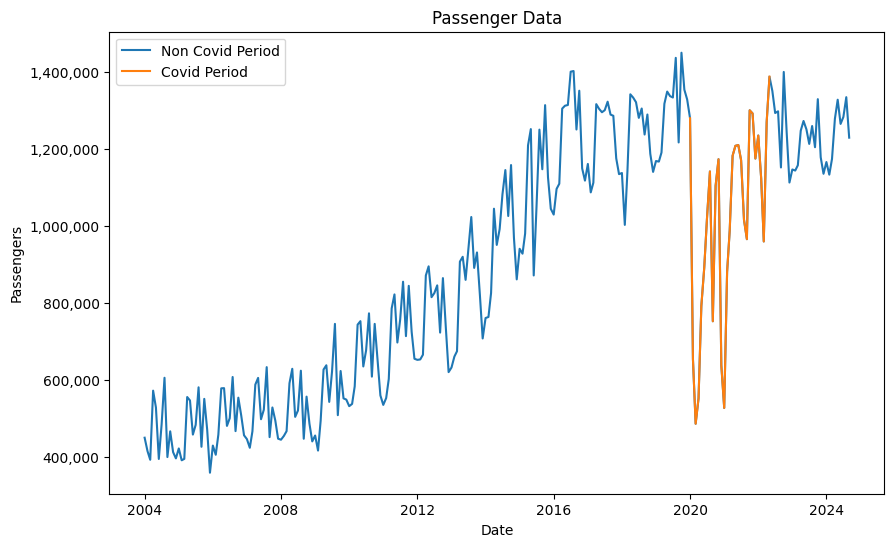

In [ ]:
# Plot passanger data
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['passengers'], label='Non Covid Period')
plt.plot(covid_data.index, covid_data['passengers'], label='Covid Period')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Adds commas for thousands
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Passenger Data')
plt.legend()
plt.show()

###**Economic Variables**

**GDP**

We can see a very stable growth over time. No particular outliers can be found. The variable is **not stationary**.

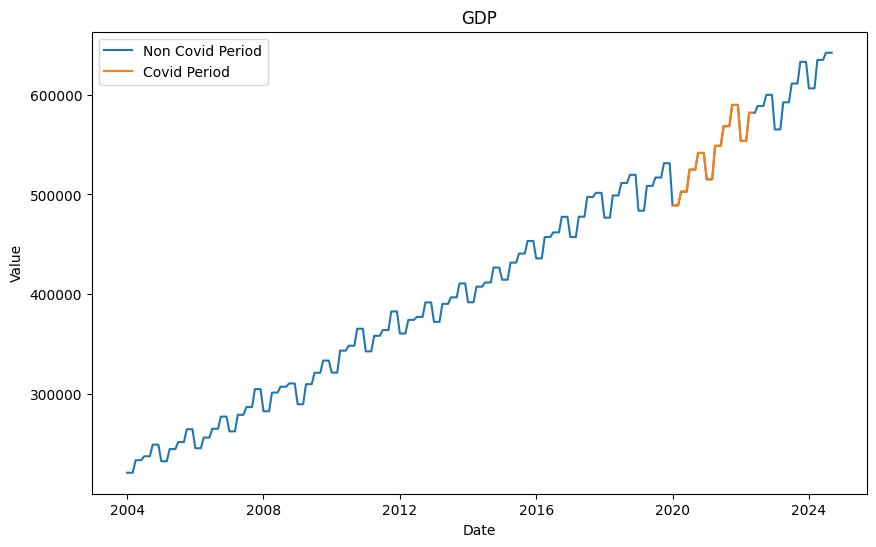

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['gdp'], label='Non Covid Period')
plt.plot(covid_data.index, covid_data['gdp'], label='Covid Period')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('GDP')
plt.legend()
plt.show()

**GDP growth**

We can see that GPD growth has a big outlier right after the Covid period.

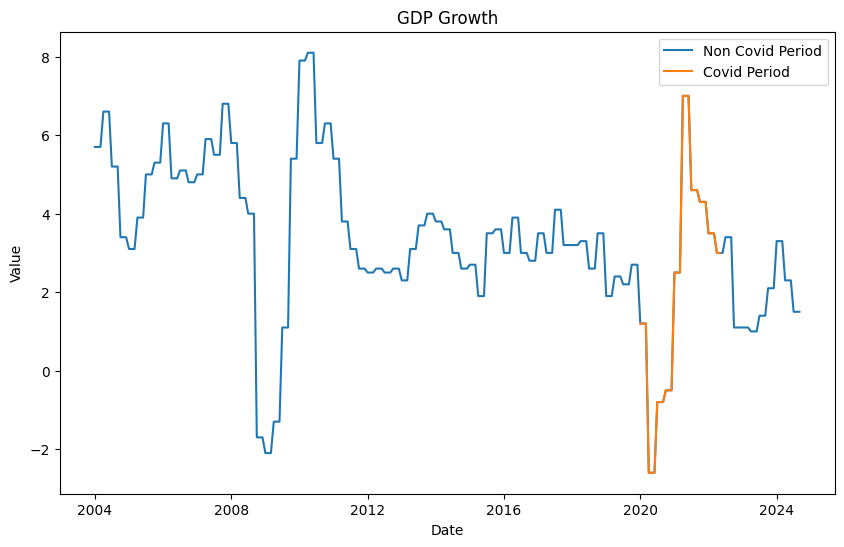

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['gdp_growth'], label='Non Covid Period')
plt.plot(covid_data.index, covid_data['gdp_growth'], label='Covid Period')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('GDP Growth')
plt.legend()
plt.show()

**ESI**

The ESI sees two big outliers. One for the Covid-19 period and another one for the Financial crisis of 2007.

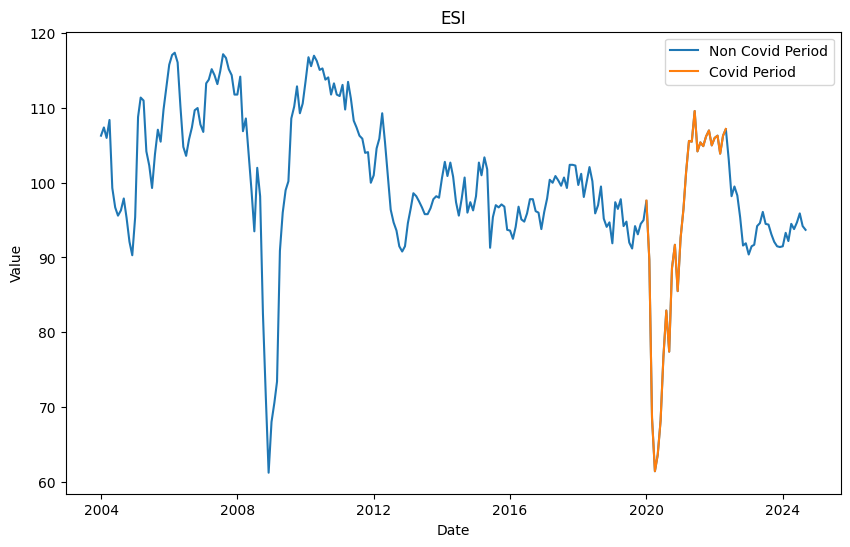

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['esi'], label='Non Covid Period')
plt.plot(covid_data.index, covid_data['esi'], label='Covid Period')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ESI')
plt.legend()

###**Japanese Travel Data**

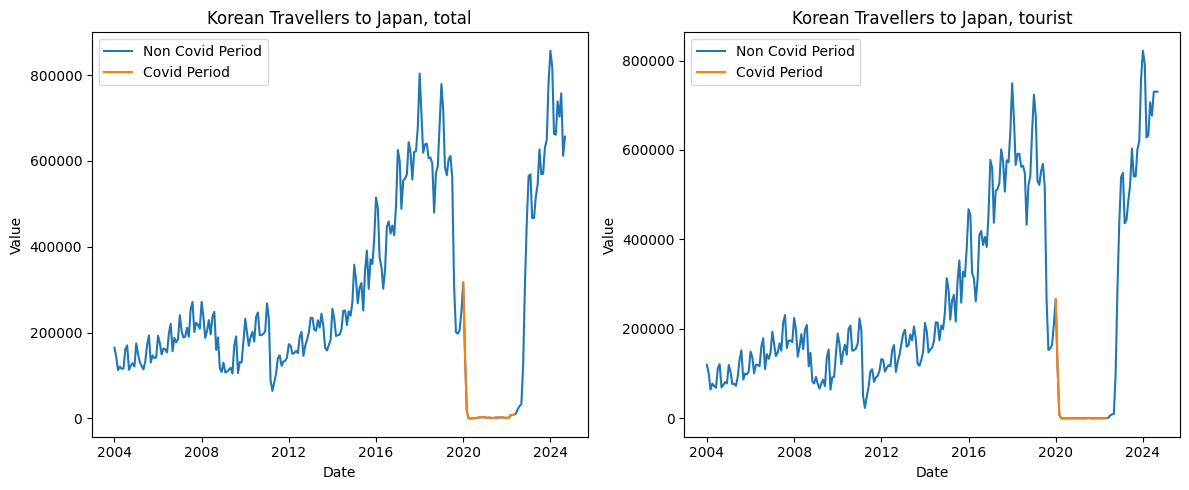

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First plot:
axes[0].plot(data.index, data['kr_jp_travel_total'], label='Non Covid Period')
axes[0].plot(covid_data.index, covid_data['kr_jp_travel_total'], label='Covid Period')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].set_title('Korean Travellers to Japan, total')
axes[0].legend()

# Second plot:
axes[1].plot(data.index, data['kr_jp_travel_tourist'], label='Non Covid Period')
axes[1].plot(covid_data.index, covid_data['kr_jp_travel_tourist'], label='Covid Period')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].set_title('Korean Travellers to Japan, tourist')
axes[1].legend()

plt.tight_layout()
plt.show()

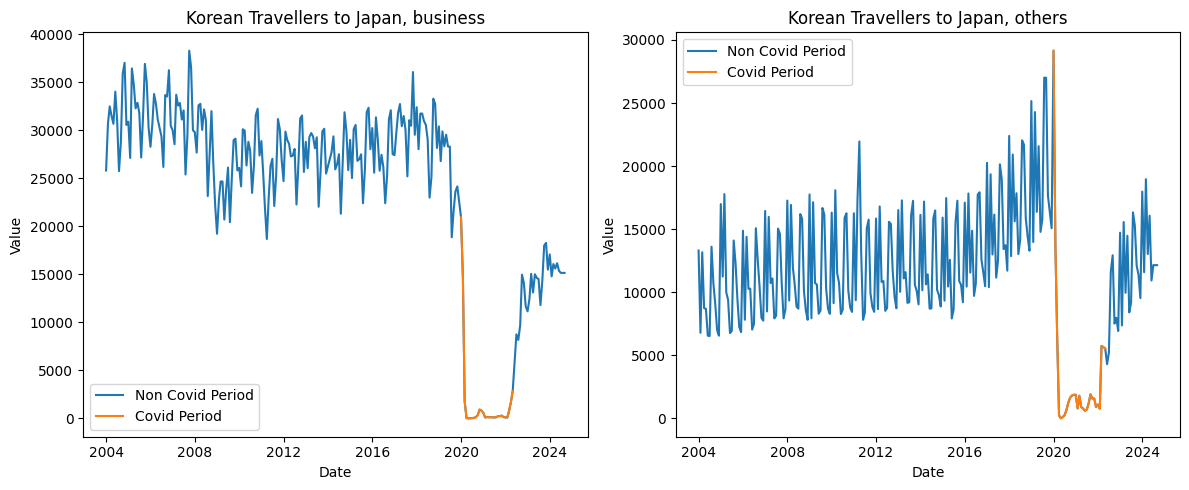

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First plot:
axes[0].plot(data.index, data['kr_jp_travel_business'], label='Non Covid Period')
axes[0].plot(covid_data.index, covid_data['kr_jp_travel_business'], label='Covid Period')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].set_title('Korean Travellers to Japan, business')
axes[0].legend()

# Second plot:
axes[1].plot(data.index, data['kr_jp_travel_others'], label='Non Covid Period')
axes[1].plot(covid_data.index, covid_data['kr_jp_travel_others'], label='Covid Period')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].set_title('Korean Travellers to Japan, others')
axes[1].legend()

plt.tight_layout()
plt.show()

### **Weather Data - Temperature and Humidity**

As expected, the weather data is very stable over time and does not contain any outliers. Furthermore, the seasonality is visible.

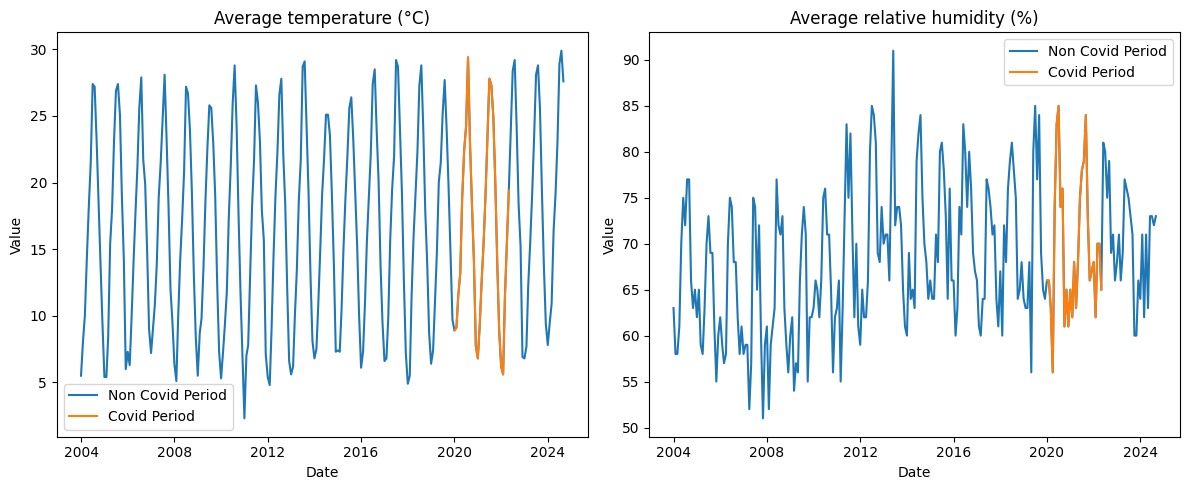

In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First plot: Average temperature
axes[0].plot(data.index, data['Average temperature (°C)'], label='Non Covid Period')
axes[0].plot(covid_data.index, covid_data['Average temperature (°C)'], label='Covid Period')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].set_title('Average temperature (°C)')
axes[0].legend()

# Second plot: Average relative humidity
axes[1].plot(data.index, data['Average relative humidity (%)'], label='Non Covid Period')
axes[1].plot(covid_data.index, covid_data['Average relative humidity (%)'], label='Covid Period')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].set_title('Average relative humidity (%)')
axes[1].legend()

plt.tight_layout()
plt.show()

## 0.2.3 Stationarity

### 0.2.3.0 Checking for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # Use the adfuller method provided by the statsmodels package
    dftest = adfuller(timeseries, autolag='AIC')

    # Organize and print the results returned by the adfuller method
    print('Results of Dickey-Fuller Test : ')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
    	dfoutput[f'Critical Value {key}'] = value

    print(dfoutput)
    print('\n')
    if dftest[1] <= 0.05:
        print("The series is stationary")
    else:
        print("The series is not stationary")


#### Target Variable - Passenger Data

The ACF suggest non-stationaity. The sharp cutoff in PACF suggests that a simple AR(1) component might suffice for the non-seasonal AR part of your model.

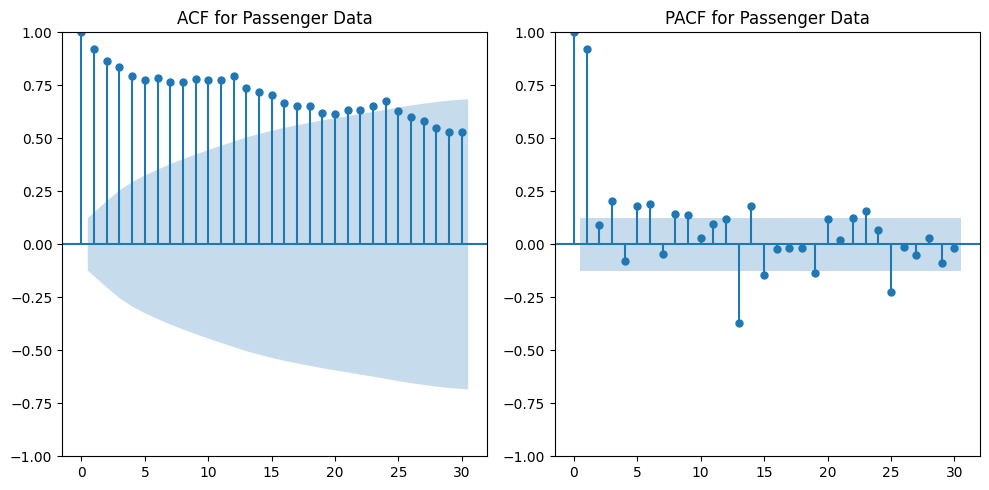

Results of Dickey-Fuller Test : 
Test Statistic                 -1
p-value                         1
#Lags Used                     14
Number of Observations Used   235
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is not stationary


In [ ]:
import statsmodels.api as sm

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['passengers'], lags=30, ax=axes[0])
axes[0].set_title('ACF for Passenger Data')

sm.graphics.tsa.plot_pacf(data['passengers'], lags=30, ax=axes[1])
axes[1].set_title('PACF for Passenger Data')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['passengers'])

#### Economic Variables

**GDP**

The ACF suggest non-stationaity. The sharp cutoff in PACF suggests that a simple AR(1) component might suffice for the non-seasonal AR part of your model.

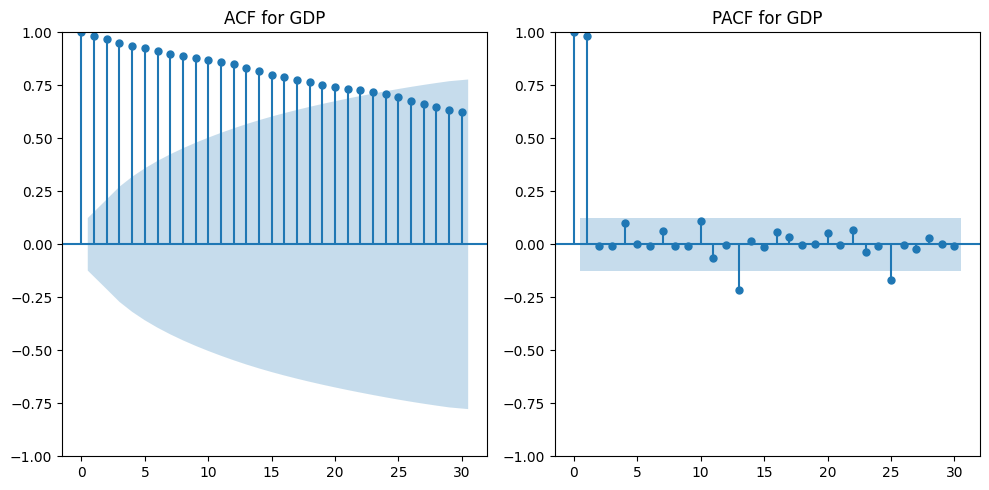

Results of Dickey-Fuller Test : 
Test Statistic                  0
p-value                         1
#Lags Used                     16
Number of Observations Used   233
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is not stationary


In [ ]:
from logging import log
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['gdp'], lags=30, ax=axes[0])
axes[0].set_title('ACF for GDP')

sm.graphics.tsa.plot_pacf(data['gdp'], lags=30, ax=axes[1])
axes[1].set_title('PACF for GDP')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['gdp'])


**GDP growth**

The ACF suggest non-stationaity. The sharp cutoff in PACF suggests that a simple AR(1) component might suffice for the non-seasonal AR part of your model.

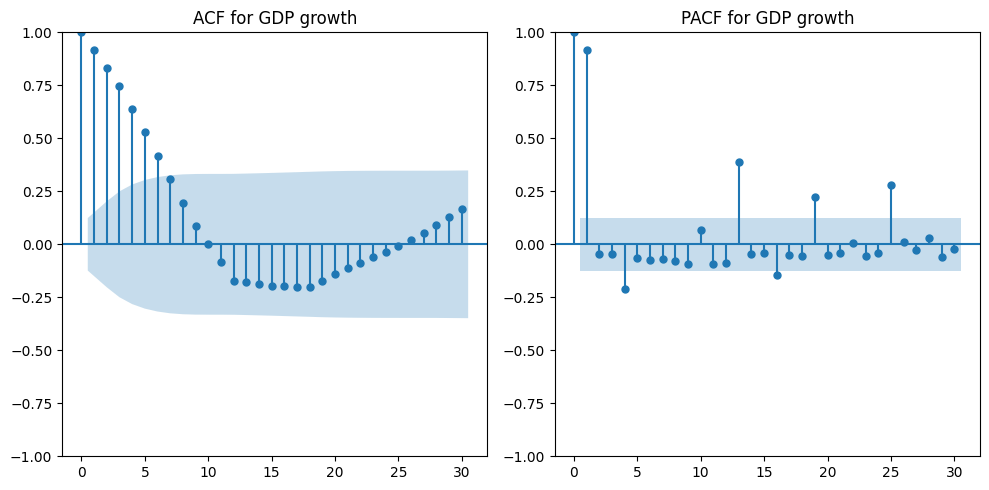

Results of Dickey-Fuller Test : 
Test Statistic                 -3
p-value                         0
#Lags Used                     12
Number of Observations Used   237
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is not stationary


In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['gdp_growth'], lags=30, ax=axes[0])
axes[0].set_title('ACF for GDP growth')

sm.graphics.tsa.plot_pacf(data['gdp_growth'], lags=30, ax=axes[1])
axes[1].set_title('PACF for GDP growth')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['gdp_growth'])


**ESI**

The ACF suggest non-stationaity. The sharp cutoff in PACF suggests that a simple AR(1) component might suffice for the non-seasonal AR part of your model.

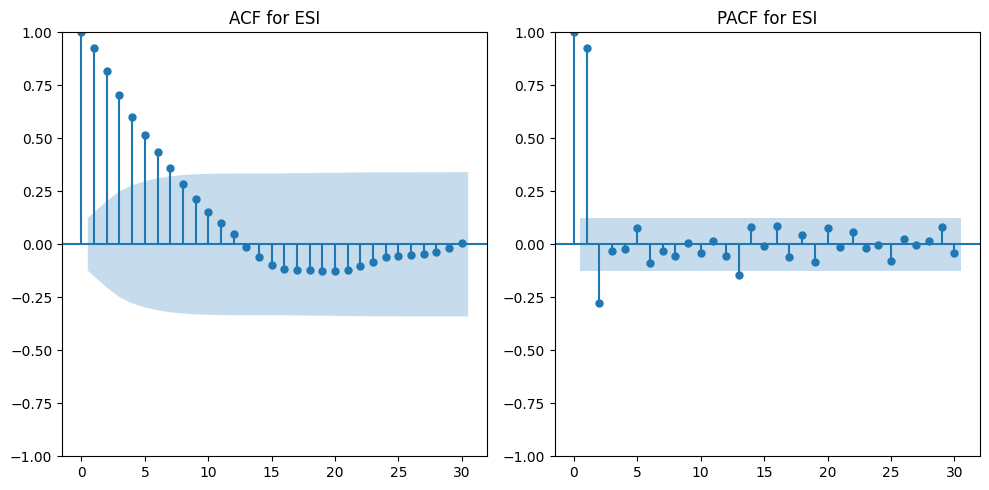

Results of Dickey-Fuller Test : 
Test Statistic                 -4
p-value                         0
#Lags Used                      1
Number of Observations Used   248
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is stationary


In [ ]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['esi'], lags=30, ax=axes[0])
axes[0].set_title('ACF for ESI')

sm.graphics.tsa.plot_pacf(data['esi'], lags=30, ax=axes[1])
axes[1].set_title('PACF for ESI')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['esi'])

#### Japanese travel data

Augmented Dickey-Fuller Test for Japanese Travel Data


Total
Results of Dickey-Fuller Test : 
Test Statistic                 -3
p-value                         0
#Lags Used                     12
Number of Observations Used   237
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is stationary


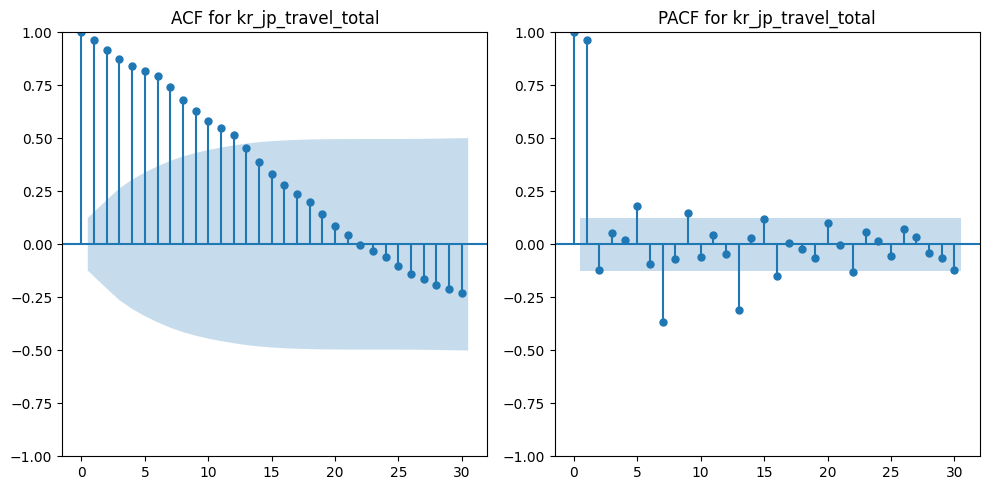

According to the DFT the total data is stationary but according to the ACF it is not, therefore we will still apply AR(1).


Tourist
Results of Dickey-Fuller Test : 
Test Statistic                 -3
p-value                         0
#Lags Used                     12
Number of Observations Used   237
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is not stationary


Business
Results of Dickey-Fuller Test : 
Test Statistic                 -2
p-value                         0
#Lags Used                     12
Number of Observations Used   237
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is not stationary


Others
Results of Dickey-Fuller Test : 
Test Statistic                 -3
p-value                         0
#Lags Used                     15
Number of Observations Used   234
Critical Value 1%              -3
Critical V

In [ ]:
print('Augmented Dickey-Fuller Test for Japanese Travel Data')
print('\n')
print('Total')
augmented_dickey_fuller_test(data['kr_jp_travel_total'])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['kr_jp_travel_total'], lags=30, ax=axes[0])
axes[0].set_title('ACF for kr_jp_travel_total')

sm.graphics.tsa.plot_pacf(data['kr_jp_travel_total'], lags=30, ax=axes[1])
axes[1].set_title('PACF for kr_jp_travel_total')

plt.tight_layout()
plt.show()

print('According to the DFT the total data is stationary but according to the ACF it is not, therefore we will still apply AR(1).')

print('\n')
print('Tourist')
augmented_dickey_fuller_test(data['kr_jp_travel_tourist'])
print('\n')
print('Business')
augmented_dickey_fuller_test(data['kr_jp_travel_business'])
print('\n')
print('Others')
augmented_dickey_fuller_test(data['kr_jp_travel_others'])



#### **Weather Data - Temperature and Humidity**



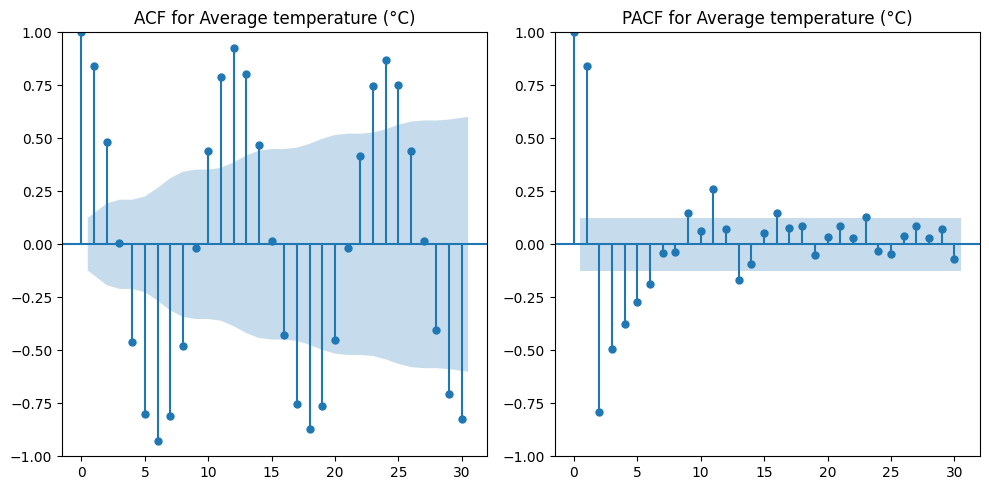

Results of Dickey-Fuller Test : 
Test Statistic                 -2
p-value                         0
#Lags Used                     11
Number of Observations Used   238
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is not stationary


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['Average temperature (°C)'], lags=30, ax=axes[0])
axes[0].set_title('ACF for Average temperature (°C)')

sm.graphics.tsa.plot_pacf(data['Average temperature (°C)'], lags=30, ax=axes[1])
axes[1].set_title('PACF for Average temperature (°C)')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['Average temperature (°C)'])


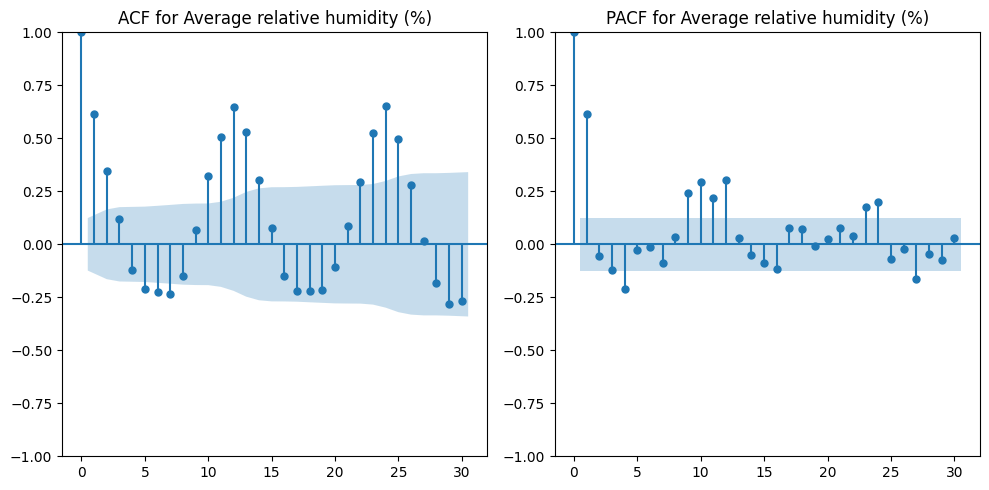

Results of Dickey-Fuller Test : 
Test Statistic                 -2
p-value                         0
#Lags Used                     15
Number of Observations Used   234
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is not stationary


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

sm.graphics.tsa.plot_acf(data['Average relative humidity (%)'], lags=30, ax=axes[0])
axes[0].set_title('ACF for Average relative humidity (%)')

sm.graphics.tsa.plot_pacf(data['Average relative humidity (%)'], lags=30, ax=axes[1])
axes[1].set_title('PACF for Average relative humidity (%)')

plt.tight_layout()
plt.show()

augmented_dickey_fuller_test(data['Average relative humidity (%)'])


#### **Weather Data - Others**

In [ ]:
print('Augmented Dickey-Fuller Test for Weather Data')
print('\n')
print('Maximum vapor pressure (hPa)')
augmented_dickey_fuller_test(data['Maximum vapor pressure (hPa)'])
print('\n')
print('Small total evapotation (mm)')
augmented_dickey_fuller_test(data['Small total evaporation (mm)'])
print('\n')
print('Average wind speed (m/s)')
augmented_dickey_fuller_test(data['Average wind speed (m/s)'])

Augmented Dickey-Fuller Test for Weather Data


Maximum vapor pressure (hPa)
Results of Dickey-Fuller Test : 
Test Statistic                 -2
p-value                         0
#Lags Used                     12
Number of Observations Used   237
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is not stationary


Small total evapotation (mm)
Results of Dickey-Fuller Test : 
Test Statistic                 -2
p-value                         0
#Lags Used                     11
Number of Observations Used   238
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is not stationary


Average wind speed (m/s)
Results of Dickey-Fuller Test : 
Test Statistic                 -3
p-value                         0
#Lags Used                     12
Number of Observations Used   237
Critical Value 1%              -3
Critical Value 5%           

### 0.2.3.1 Obtain Stationaity by applying AR(1)

We obtain stationairty by applying first order differencing to the variables we have found to be non-stationary.

In [ ]:
def apply_first_order_differencing(data, var):
    data[var + '_raw'] = data[var]
    shift = data[var].shift()
    data[var + '_diff'] = data[var] - shift
    data[var] = data[var + '_diff']

    to_be_tested = data[var + '_diff'].dropna()

    print('Stationarity Test:')
    augmented_dickey_fuller_test(to_be_tested)


In [ ]:
print('After Applying First Order Differencing', '\n')

print('Target Variable - Passanger Data', '\n')
apply_first_order_differencing(data, 'passengers')
print('\n')
print('Economic Variables - GDP', '\n')
apply_first_order_differencing(data, 'gdp')
print('\n')
print('Japanese Travel Data - Total', '\n')
apply_first_order_differencing(data, 'kr_jp_travel_total')
print('We decide that the p-value bellow 10% suffices for stationarity.')
print('\n')
print('Japanese Travel Data - Tourist', '\n')
apply_first_order_differencing(data, 'kr_jp_travel_tourist')
print('We decide that the p-value bellow 10% suffices for stationarity.')
print('\n')
print('Japanese Travel Data - Business', '\n')
apply_first_order_differencing(data, 'kr_jp_travel_business')
print('\n')
print('Japanese Travel Data - Others', '\n')
apply_first_order_differencing(data, 'kr_jp_travel_others')
print('\n')
print('Weather Data - Temperature and Humidity', '\n')
apply_first_order_differencing(data, 'Average temperature (°C)')
print('\n')
apply_first_order_differencing(data, 'Average relative humidity (%)')
print('\n')
print('Weather Data - Others', '\n')
apply_first_order_differencing(data, 'Maximum vapor pressure (hPa)')
print('\n')
apply_first_order_differencing(data, 'Small total evaporation (mm)')
print('\n')
apply_first_order_differencing(data, 'Average wind speed (m/s)')


After Applying First Order Differencing 

Target Variable - Passanger Data 

Stationarity Test:
Results of Dickey-Fuller Test : 
Test Statistic                 -5
p-value                         0
#Lags Used                     13
Number of Observations Used   235
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is stationary


Economic Variables - GDP 

Stationarity Test:
Results of Dickey-Fuller Test : 
Test Statistic                 -4
p-value                         0
#Lags Used                     15
Number of Observations Used   233
Critical Value 1%              -3
Critical Value 5%              -3
Critical Value 10%             -3
dtype: float64


The series is stationary


Japanese Travel Data - Total 

Stationarity Test:
Results of Dickey-Fuller Test : 
Test Statistic                 -3
p-value                         0
#Lags Used                     11
Number of Observations Used   237
Critical 

We have to drop the first observation after differencing.

In [ ]:
data = data.iloc[1:]
data.head()

passengers  esi    gdp  gdp_growth  kr_jp_travel_total  \
date                                                                 
2004-02-01     -34,952  107      0           6             -22,067   
2004-03-01     -22,391  106      0           6             -30,202   
2004-04-01     179,597  108 12,550           7               7,911   
2004-05-01     -43,678   99      0           7              -4,768   
2004-06-01    -133,809   97      0           7                 610   

            kr_jp_travel_tourist  kr_jp_travel_business  kr_jp_travel_others  \
date                                                                           
2004-02-01               -19,920                  4,894               -6,521   
2004-03-01               -35,182                  1,790                6,386   
2004-04-01                13,238                 -1,020               -4,431   
2004-05-01                -5,286                   -797                  -62   
2004-06-01                -3,901                  3,352               -2,119   

            Average temperature (°C)  Average High Temperature (°C)  ...  \
date                                                                 ...   
2004-02-01                         3                             12  ...   
2004-03-01                         2                             14  ...   
2004-04-01                         4                             18  ...   
2004-05-01                         4                             22  ...   
2004-06-01                         3                             25  ...   

            Average temperature (°C)_raw  Average temperature (°C)_diff  \
date                                                                      
2004-02-01                             8                              3   
2004-03-01                            10                              2   
2004-04-01                            14                              4   
2004-05-01                            18                              4   
2004-06-01                            22                              3   

            Average relative humidity (%)_raw  \
date                                            
2004-02-01                                 58   
2004-03-01                                 58   
2004-04-01                                 61   
2004-05-01                                 70   
2004-06-01                                 75   

            Average relative humidity (%)_diff  \
date                                             
2004-02-01                                  -5   
2004-03-01                                   0   
2004-04-01                                   3   
2004-05-01                                   9   
2004-06-01                                   5   

            Maximum vapor pressure (hPa)_raw  \
date                                           
2004-02-01                                17   
2004-03-01                                16   
2004-04-01                                20   
2004-05-01                                24   
2004-06-01                                28   

            Maximum vapor pressure (hPa)_diff  \
date                                            
2004-02-01                                  7   
2004-03-01                                 -1   
2004-04-01                                  4   
2004-05-01                                  5   
2004-06-01                                  4   

            Small total evaporation (mm)_raw  \
date                                           
2004-02-01                                76   
2004-03-01                                96   
2004-04-01                               106   
2004-05-01                               114   
2004-06-01                               123   

            Small total evaporation (mm)_diff  Average wind speed (m/s)_raw  \
date                                                                          
2004-02-01                    

### 0.2.3.2 Vizualisation after gaining Stationarity

**Target Variable - Passanger Data**

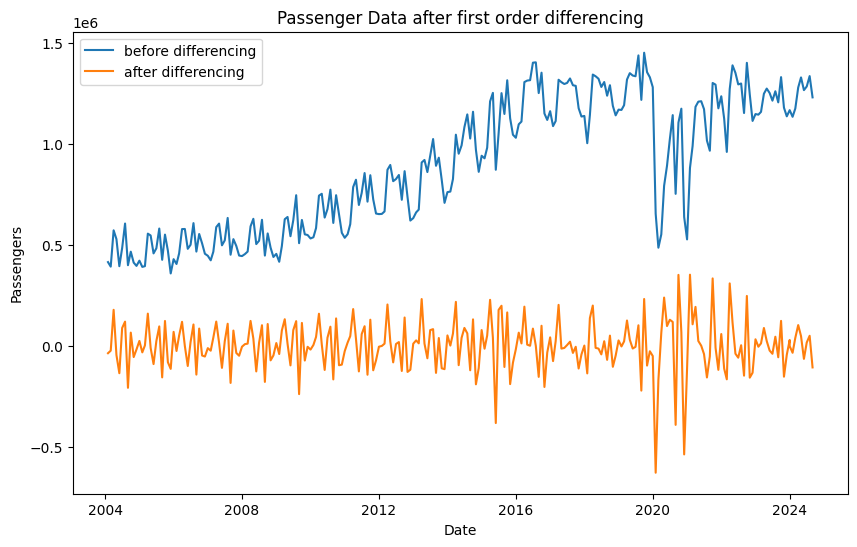

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['passengers_raw'], label='before differencing')
plt.plot(data.index, data['passengers'], label='after differencing')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Passenger Data after first order differencing')
plt.legend()
plt.show()

**Economic Variables - GDP**

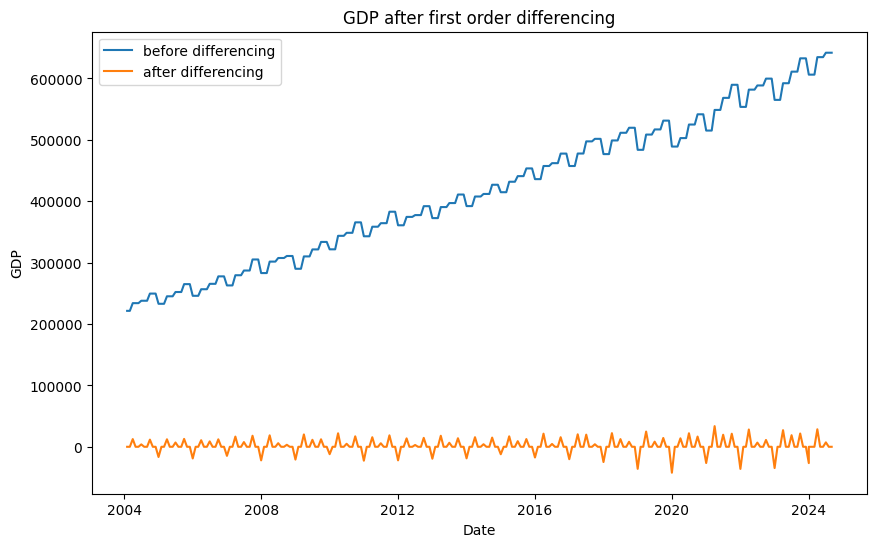

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['gdp_raw'], label='before differencing')
plt.plot(data.index, data['gdp'], label='after differencing')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP after first order differencing')
plt.legend()
plt.show()

**Japanese Travel Data**

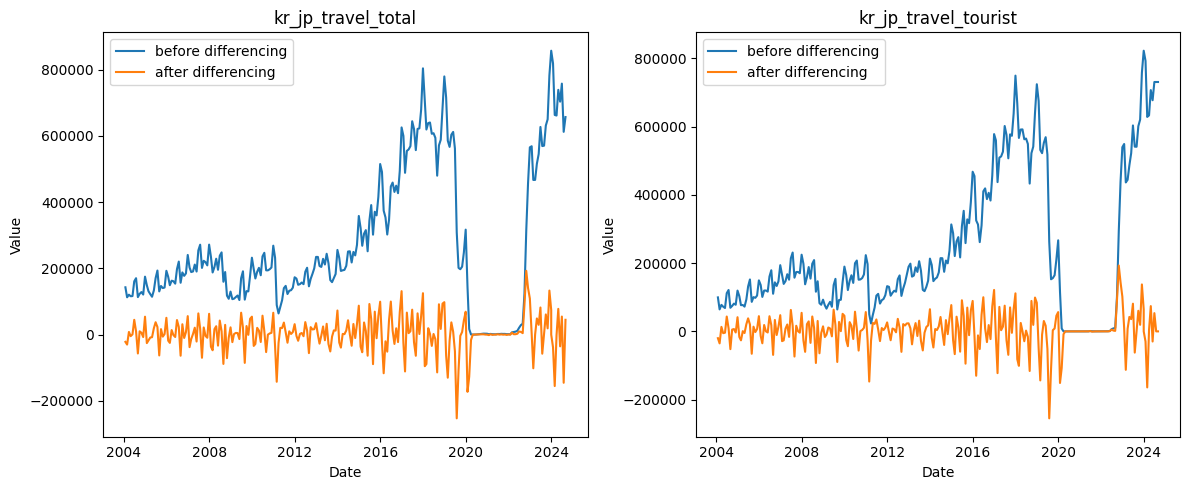

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First plot: Average temperature
axes[0].plot(data.index, data['kr_jp_travel_total_raw'], label='before differencing')
axes[0].plot(data.index, data['kr_jp_travel_total'], label='after differencing')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].set_title('kr_jp_travel_total')
axes[0].legend()

# Second plot: Average relative humidity
axes[1].plot(data.index, data['kr_jp_travel_tourist_raw'], label='before differencing')
axes[1].plot(data.index, data['kr_jp_travel_tourist'], label='after differencing')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].set_title('kr_jp_travel_tourist')
axes[1].legend()

plt.tight_layout()
plt.show()

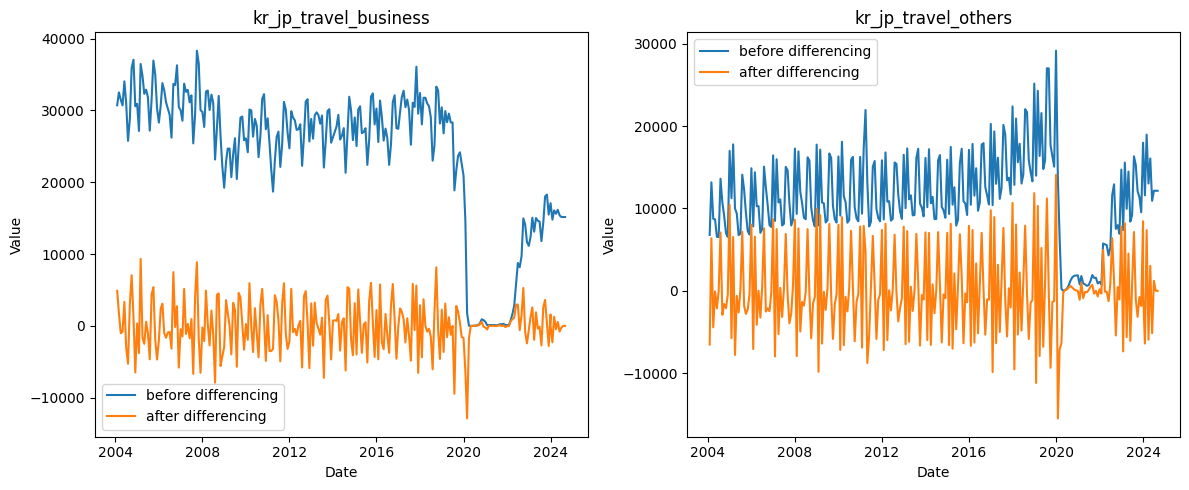

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First plot: Average temperature
axes[0].plot(data.index, data['kr_jp_travel_business_raw'], label='before differencing')
axes[0].plot(data.index, data['kr_jp_travel_business'], label='after differencing')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].set_title('kr_jp_travel_business')
axes[0].legend()

# Second plot: Average relative humidity
axes[1].plot(data.index, data['kr_jp_travel_others_raw'], label='before differencing')
axes[1].plot(data.index, data['kr_jp_travel_others'], label='after differencing')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].set_title('kr_jp_travel_others')
axes[1].legend()

plt.tight_layout()
plt.show()

**Weather Data - Temperature and Humidity**

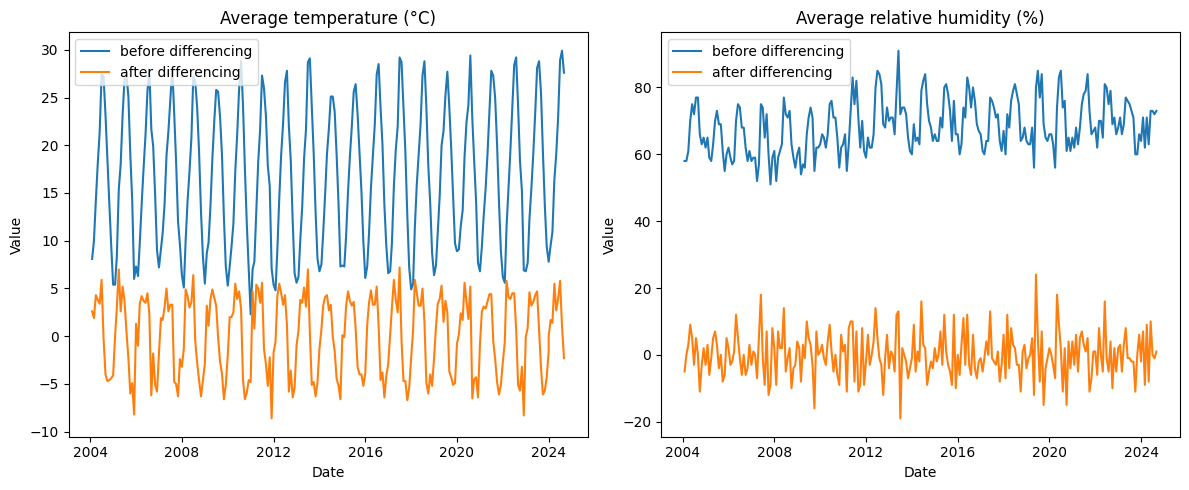

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First plot: Average temperature
axes[0].plot(data.index, data['Average temperature (°C)_raw'], label='before differencing')
axes[0].plot(data.index, data['Average temperature (°C)'], label='after differencing')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')
axes[0].set_title('Average temperature (°C)')
axes[0].legend()

# Second plot: Average relative humidity
axes[1].plot(data.index, data['Average relative humidity (%)_raw'], label='before differencing')
axes[1].plot(data.index, data['Average relative humidity (%)'], label='after differencing')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')
axes[1].set_title('Average relative humidity (%)')
axes[1].legend()

plt.tight_layout()
plt.show()

## 0.2.4 Covid Partitioning for Preprocessing

In [ ]:
# Data without Covid period (without Jan 2020 to June 2022)
no_covid_data = data[data['covid19_period'] == 0]

# Data with only Covid period (only between Jan 2020 to June 2022)
covid_data = data[data['covid19_period'] == 1]

# Data with only pre Covid period (only before Jan 2020)
pre_covid_data = data[data.index < covid_period[0]]

# Data with only post Covid period (only after June 2022)
post_covid_data = data[data.index > covid_period[1]]

# Create independent copies of each dataset
data = data.copy(deep=True)
data.name = 'Total period'
no_covid_data = no_covid_data.copy(deep=True)
no_covid_data.name = 'Pre and post Covid period'
covid_data = covid_data.copy(deep=True)
covid_data.name = 'Covid period'
pre_covid_data = pre_covid_data.copy(deep=True)
pre_covid_data.name = 'Pre Covid period'
post_covid_data = post_covid_data.copy(deep=True)
post_covid_data.name = 'Post Covid period'


## 0.2.5 Outlier Handling

Some functions to handle outliers.

In [ ]:
import scipy.stats as stats
from scipy.stats.mstats import winsorize

# Define function which apply Chauvenet criterion to detect outlier
def chauvenet_criterion(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    N = len(data)

    # Calculate the Z-scores of each data point
    z_scores = np.abs(data - mean) / std_dev

    # Calculate the probability of each Z-score
    probabilities = 1 - stats.norm.cdf(z_scores)

    # Calculate the Chauvenet's criterion threshold
    criterion_threshold = 1.0 / (2 * N)

    # Identify outliers based on the criterion
    outliers = data[probabilities < criterion_threshold]
    return outliers

def visualize_outliers(data, var):
    plt.figure(figsize=(5, 3))
    outliers = chauvenet_criterion(data[var])
    outlier_indices = data[var].isin(outliers)
    plt.plot(data.index, data[var], marker='o', linestyle='-', label=var, markersize=2)
    plt.scatter(data.index[outlier_indices], data[var][outlier_indices], color='red', marker='x', s=100, label='Outliers', zorder=5)
    plt.title(var + ' Over Time in ' + data.name)
    plt.ylabel(var)
    plt.xlabel('Datetime')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def winsorize_outliers(data, var):
    outliers = chauvenet_criterion(data[var])
    outlier_indices = data[var].isin(outliers)
    data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
    visualize_after_winsorization(data, var, outlier_indices)

def visualize_after_winsorization(data, var, outlier_indices):
  plt.figure(figsize=(5, 3))
  plt.plot(data.index, data[var], marker='o', linestyle='-', label=var, markersize=2)
  plt.scatter(data.index[outlier_indices], data[var][outlier_indices], color='green', marker='o', s=100, label='Winsorized outliers', zorder=5)
  plt.title(var + ' Over Time in ' + data.name + ' after Winsorization')
  plt.ylabel(var)
  plt.xlabel('Datetime')
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.legend()
  plt.show()


#### Target Variable - Passenger Data

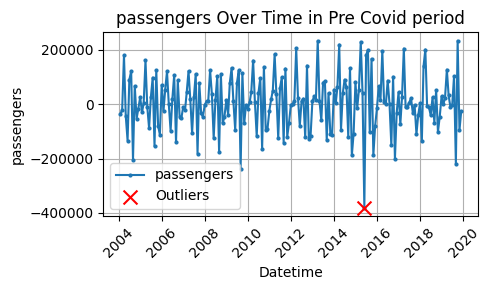

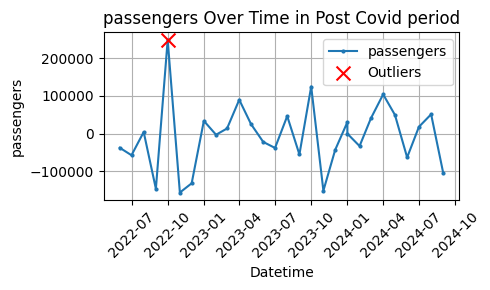

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

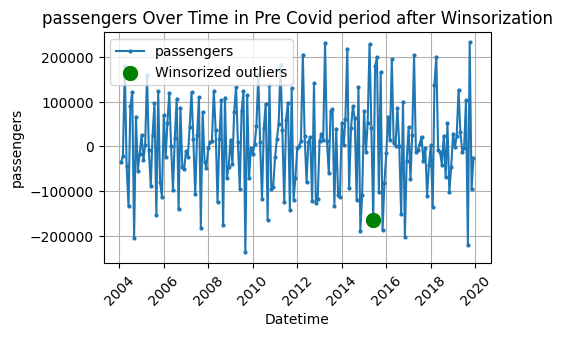

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

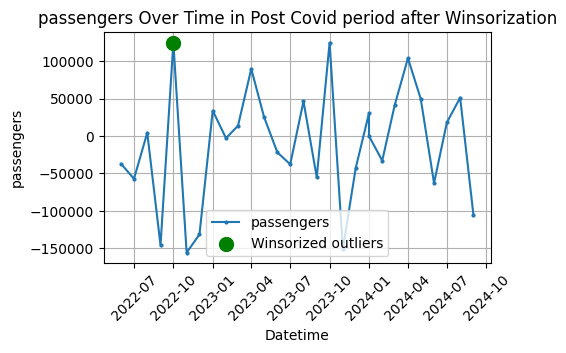

passengers  esi    gdp  gdp_growth  kr_jp_travel_total  \
date                                                                 
2004-02-01     -34,952  107      0           6             -22,067   
2004-03-01     -22,391  106      0           6             -30,202   
2004-04-01     179,597  108 12,550           7               7,911   
2004-05-01     -43,678   99      0           7              -4,768   
2004-06-01    -133,809   97      0           7                 610   

            kr_jp_travel_tourist  kr_jp_travel_business  kr_jp_travel_others  \
date                                                                           
2004-02-01               -19,920                  4,894               -6,521   
2004-03-01               -35,182                  1,790                6,386   
2004-04-01                13,238                 -1,020               -4,431   
2004-05-01                -5,286                   -797                  -62   
2004-06-01                -3,901                  3,352               -2,119   

            Average temperature (°C)  Average High Temperature (°C)  ...  \
date                                                                 ...   
2004-02-01                         3                             12  ...   
2004-03-01                         2                             14  ...   
2004-04-01                         4                             18  ...   
2004-05-01                         4                             22  ...   
2004-06-01                         3                             25  ...   

            Average temperature (°C)_raw  Average temperature (°C)_diff  \
date                                                                      
2004-02-01                             8                              3   
2004-03-01                            10                              2   
2004-04-01                            14                              4   
2004-05-01                            18                              4   
2004-06-01                            22                              3   

            Average relative humidity (%)_raw  \
date                                            
2004-02-01                                 58   
2004-03-01                                 58   
2004-04-01                                 61   
2004-05-01                                 70   
2004-06-01                                 75   

            Average relative humidity (%)_diff  \
date                                             
2004-02-01                                  -5   
2004-03-01                                   0   
2004-04-01                                   3   
2004-05-01                                   9   
2004-06-01                                   5   

            Maximum vapor pressure (hPa)_raw  \
date                                           
2004-02-01                                17   
2004-03-01                                16   
2004-04-01                                20   
2004-05-01                                24   
2004-06-01                                28   

            Maximum vapor pressure (hPa)_diff  \
date                                            
2004-02-01                                  7   
2004-03-01                                 -1   
2004-04-01                                  4   
2004-05-01                                  5   
2004-06-01                                  4   

            Small total evaporation (mm)_raw  \
date                                           
2004-02-01                                76   
2004-03-01                                96   
2004-04-01                               106   
2004-05-01                               114   
2004-06-01                               123   

            Small total evaporation (mm)_diff  Average wind speed (m/s)_raw  \
date                                                                          
2004-02-01                    

In [ ]:
visualize_outliers(pre_covid_data, 'passengers')
visualize_outliers(post_covid_data, 'passengers')
winsorize_outliers(pre_covid_data, 'passengers')
winsorize_outliers(post_covid_data, 'passengers')

pre_covid_data.head()


#### Economic Variables

**GDP**

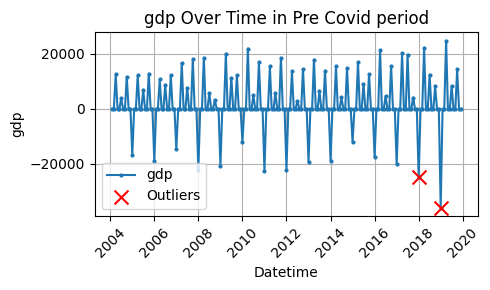

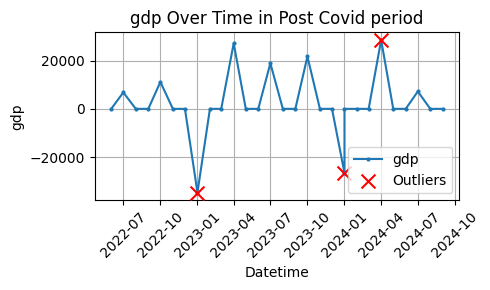

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

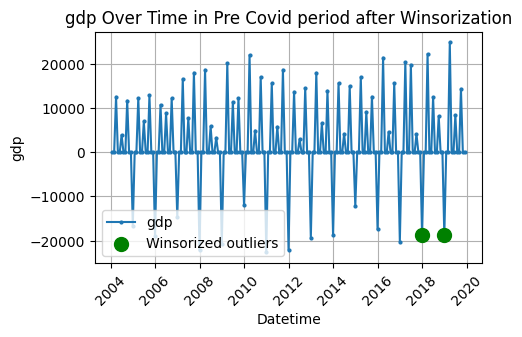

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

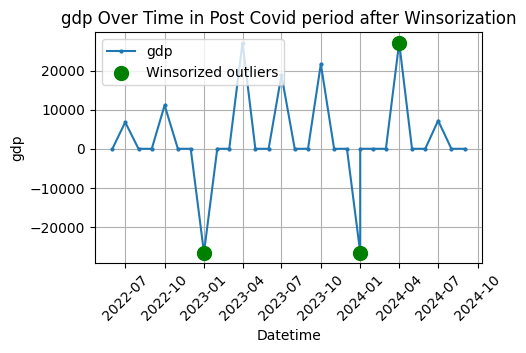

In [ ]:
visualize_outliers(pre_covid_data, 'gdp')
visualize_outliers(post_covid_data, 'gdp')
winsorize_outliers(pre_covid_data, 'gdp')
winsorize_outliers(post_covid_data, 'gdp')

**GDP Growth**

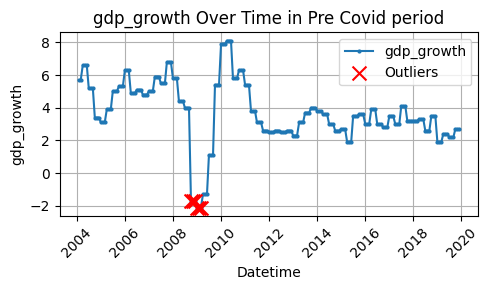

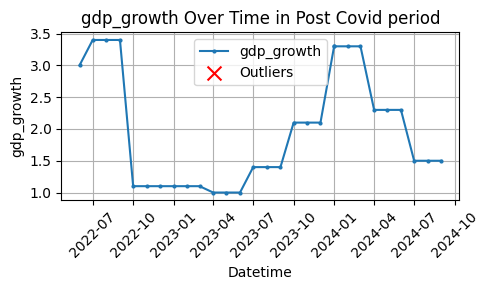

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

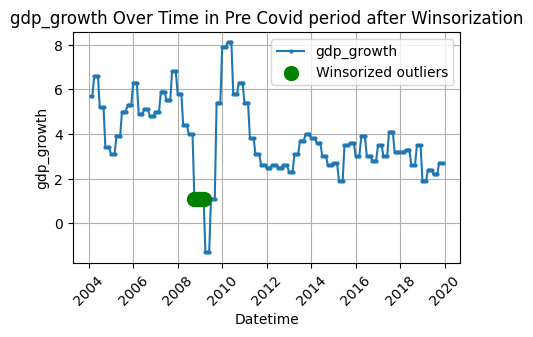

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

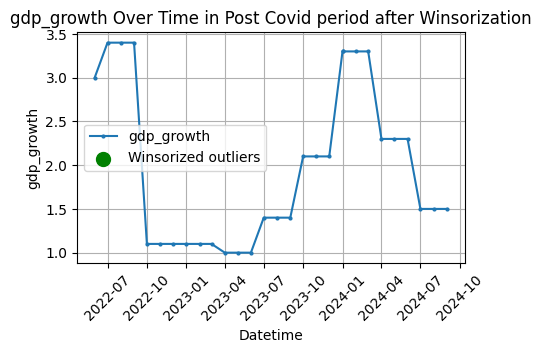

In [ ]:
visualize_outliers(pre_covid_data, 'gdp_growth')
visualize_outliers(post_covid_data, 'gdp_growth')
winsorize_outliers(pre_covid_data, 'gdp_growth')
winsorize_outliers(post_covid_data, 'gdp_growth')

**ESI**

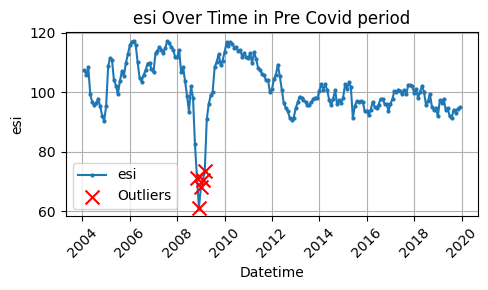

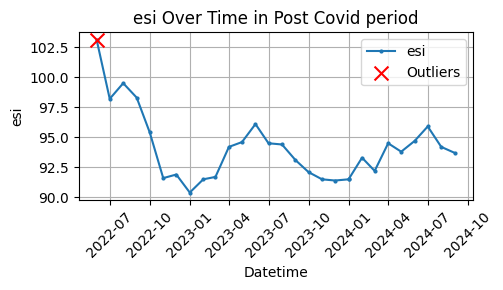

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

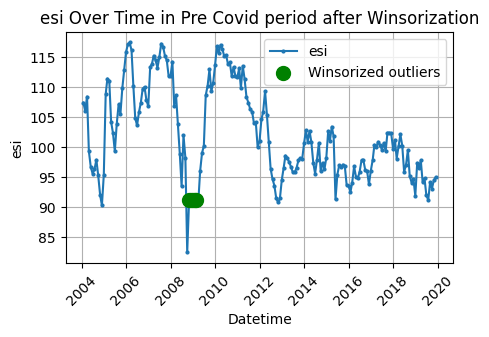

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

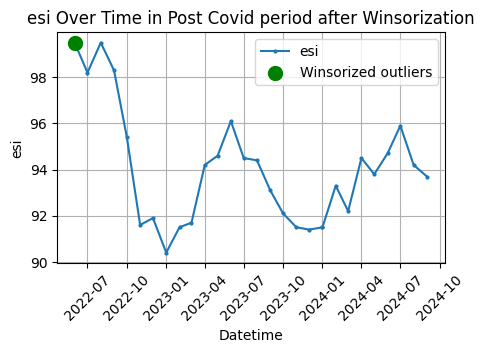

In [ ]:
visualize_outliers(pre_covid_data, 'esi')
visualize_outliers(post_covid_data, 'esi')
winsorize_outliers(pre_covid_data, 'esi')
winsorize_outliers(post_covid_data, 'esi')

#### **Japanese Travel data**

**Japanese Travel data - Total**

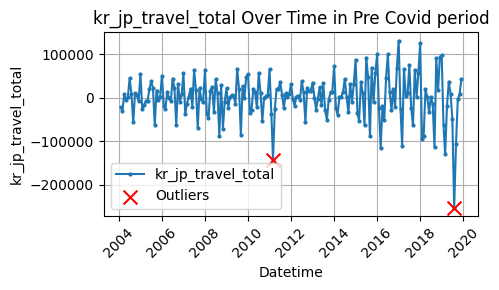

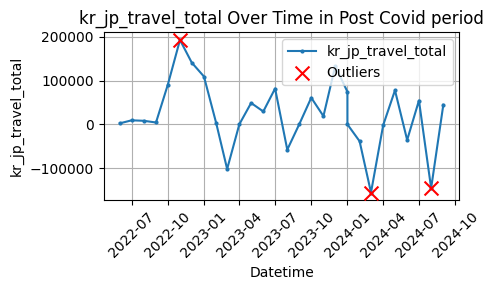

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

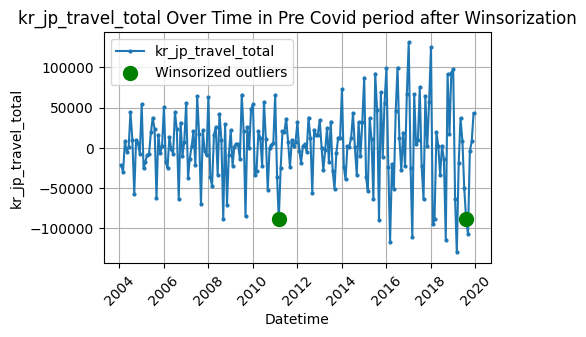

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

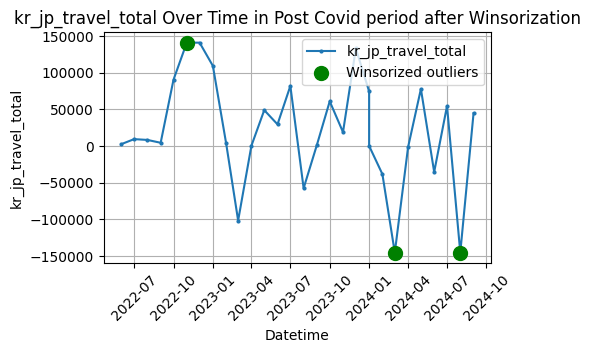

In [ ]:
visualize_outliers(pre_covid_data, 'kr_jp_travel_total')
visualize_outliers(post_covid_data, 'kr_jp_travel_total')
winsorize_outliers(pre_covid_data, 'kr_jp_travel_total')
winsorize_outliers(post_covid_data, 'kr_jp_travel_total')

**Japanese Travel data - Tourist**

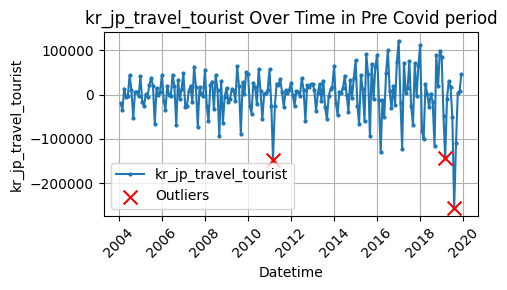

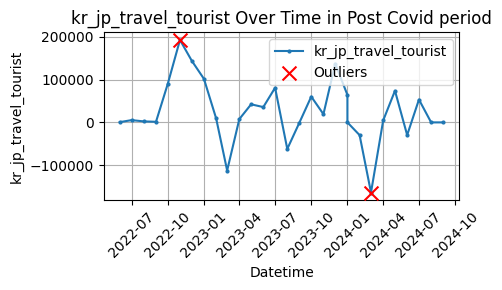

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

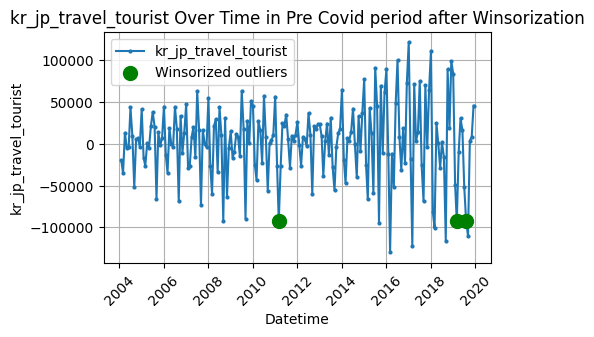

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

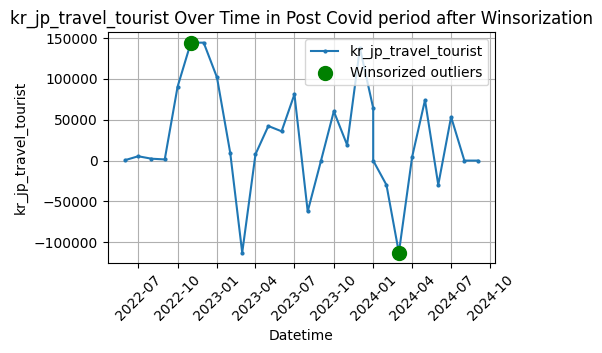

In [ ]:
visualize_outliers(pre_covid_data, 'kr_jp_travel_tourist')
visualize_outliers(post_covid_data, 'kr_jp_travel_tourist')
winsorize_outliers(pre_covid_data, 'kr_jp_travel_tourist')
winsorize_outliers(post_covid_data, 'kr_jp_travel_tourist')

**Japanese Travel data - Business**

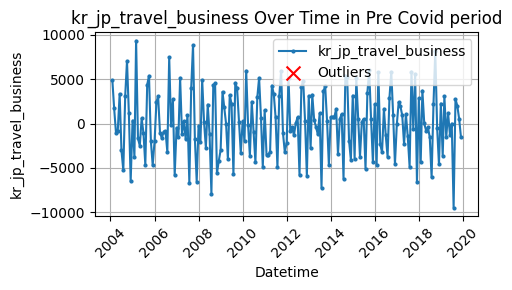

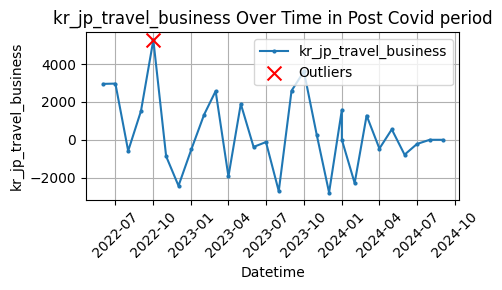

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

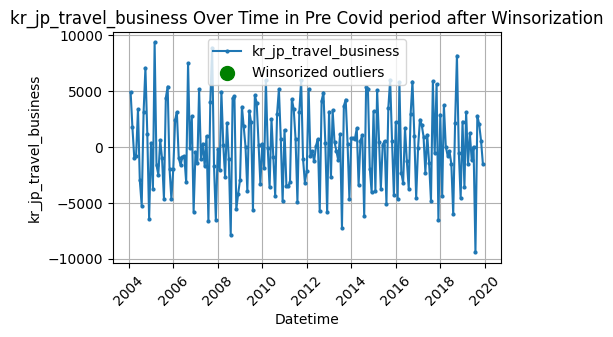

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

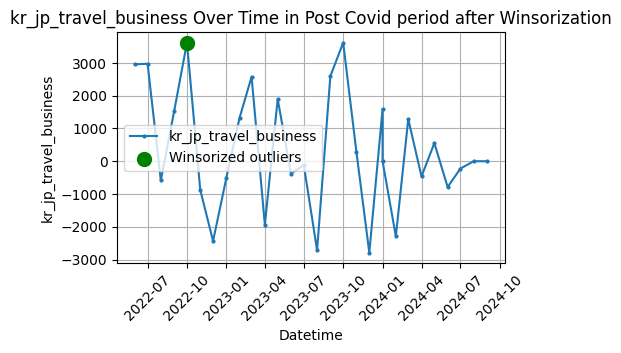

In [ ]:
visualize_outliers(pre_covid_data, 'kr_jp_travel_business')
visualize_outliers(post_covid_data, 'kr_jp_travel_business')
winsorize_outliers(pre_covid_data, 'kr_jp_travel_business')
winsorize_outliers(post_covid_data, 'kr_jp_travel_business')

**Japanese Travel data - Others**

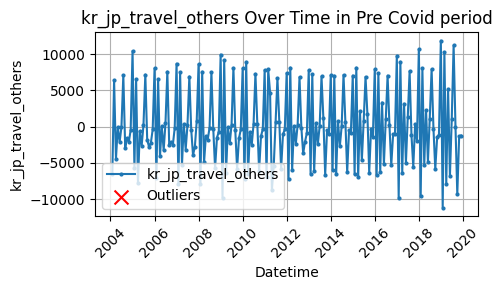

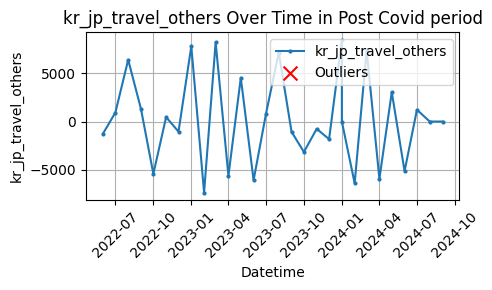

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

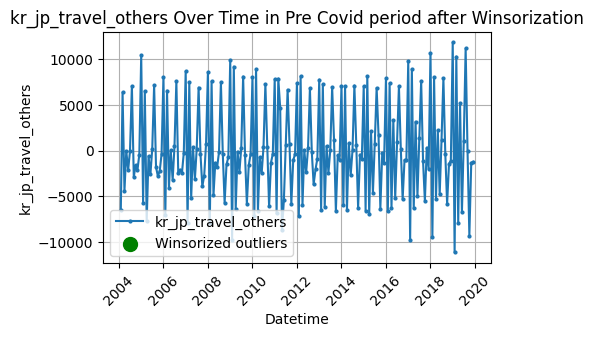

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

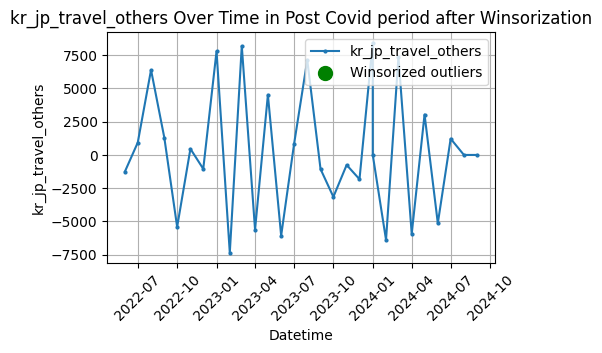

In [ ]:
visualize_outliers(pre_covid_data, 'kr_jp_travel_others')
visualize_outliers(post_covid_data, 'kr_jp_travel_others')
winsorize_outliers(pre_covid_data, 'kr_jp_travel_others')
winsorize_outliers(post_covid_data, 'kr_jp_travel_others')

#### **Weather Data**



**Temperature**

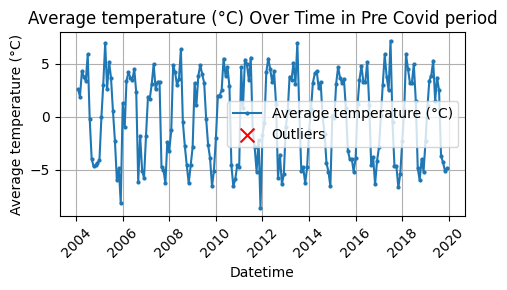

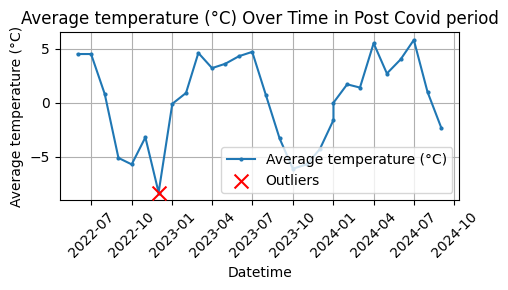

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

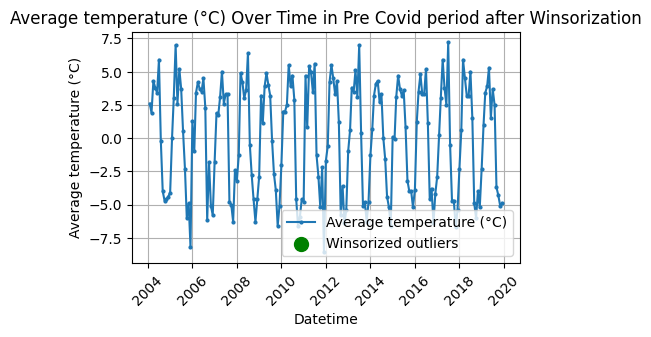

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

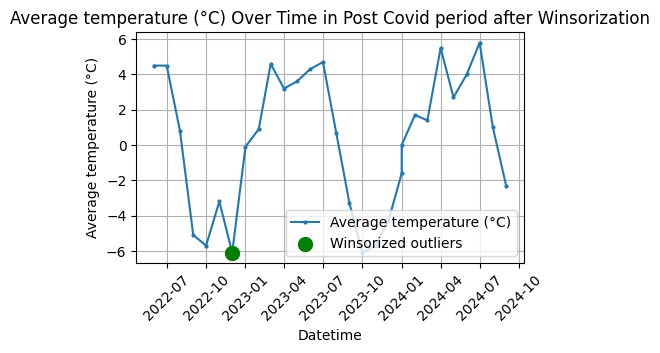

In [ ]:
visualize_outliers(pre_covid_data, 'Average temperature (°C)')
visualize_outliers(post_covid_data, 'Average temperature (°C)')
winsorize_outliers(pre_covid_data, 'Average temperature (°C)')
winsorize_outliers(post_covid_data, 'Average temperature (°C)')

**Humidity**

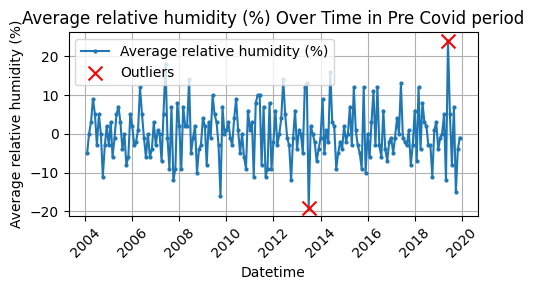

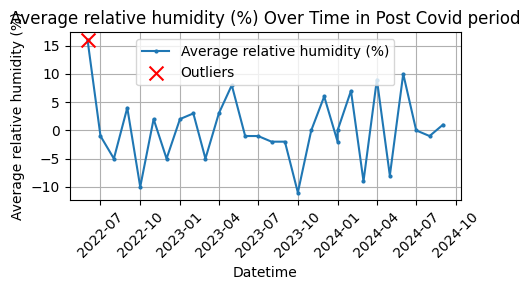

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

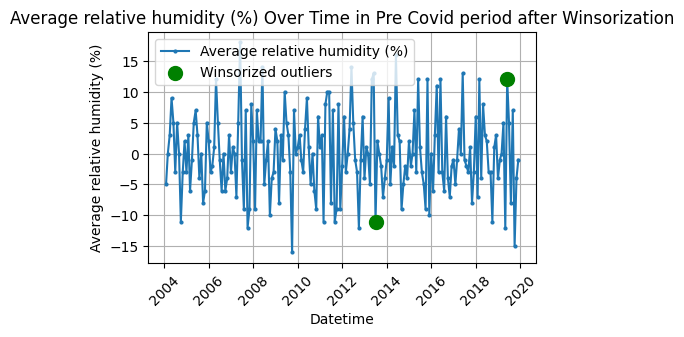

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

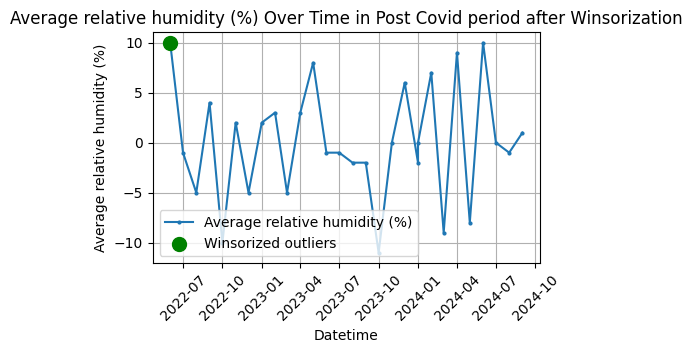

In [ ]:
visualize_outliers(pre_covid_data, 'Average relative humidity (%)')
visualize_outliers(post_covid_data, 'Average relative humidity (%)')
winsorize_outliers(pre_covid_data, 'Average relative humidity (%)')
winsorize_outliers(post_covid_data, 'Average relative humidity (%)')

**Maximum vapor pressure (hPa)**

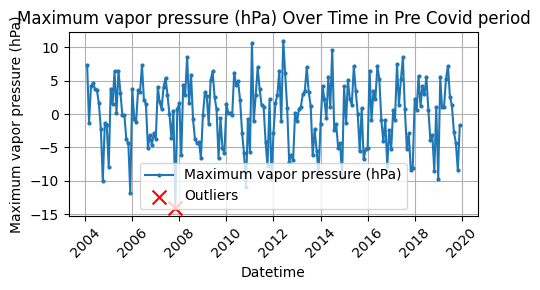

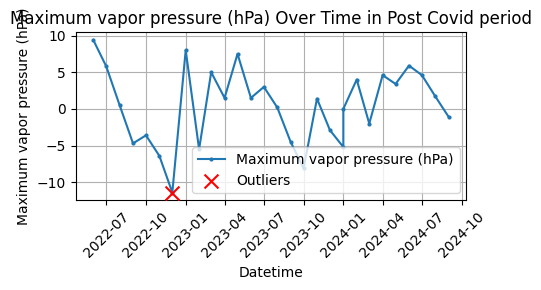

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

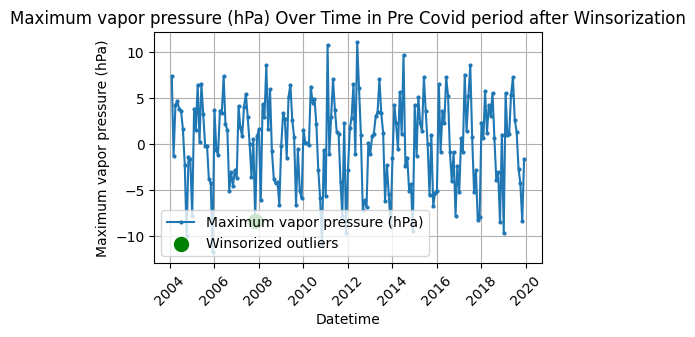

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

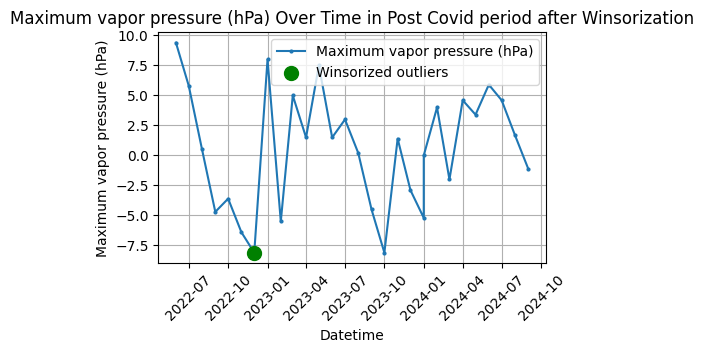

In [ ]:
visualize_outliers(pre_covid_data, 'Maximum vapor pressure (hPa)')
visualize_outliers(post_covid_data, 'Maximum vapor pressure (hPa)')
winsorize_outliers(pre_covid_data, 'Maximum vapor pressure (hPa)')
winsorize_outliers(post_covid_data, 'Maximum vapor pressure (hPa)')

**Small total evaporation**

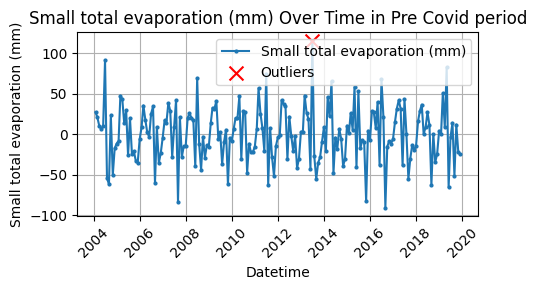

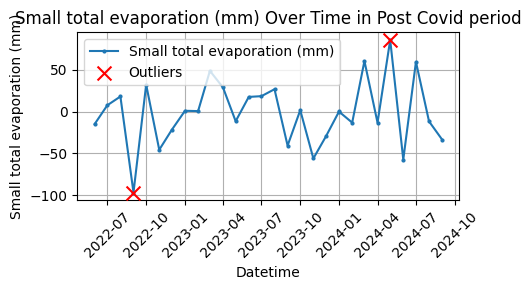

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

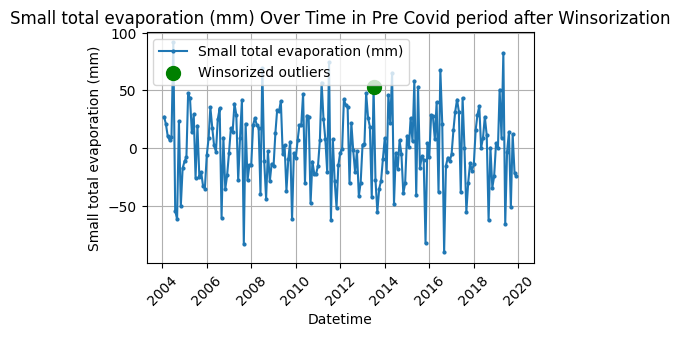

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

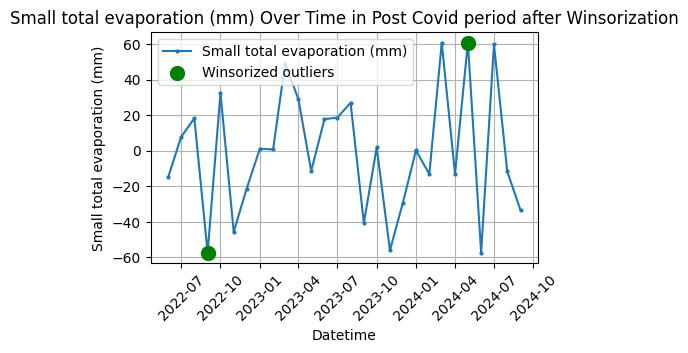

In [ ]:
visualize_outliers(pre_covid_data, 'Small total evaporation (mm)')
visualize_outliers(post_covid_data, 'Small total evaporation (mm)')
winsorize_outliers(pre_covid_data, 'Small total evaporation (mm)')
winsorize_outliers(post_covid_data, 'Small total evaporation (mm)')

**Average wind speed**

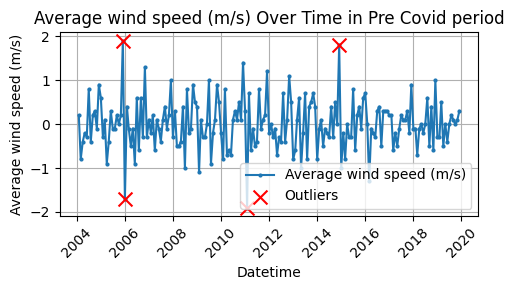

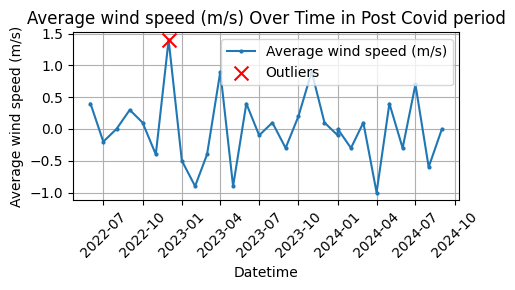

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

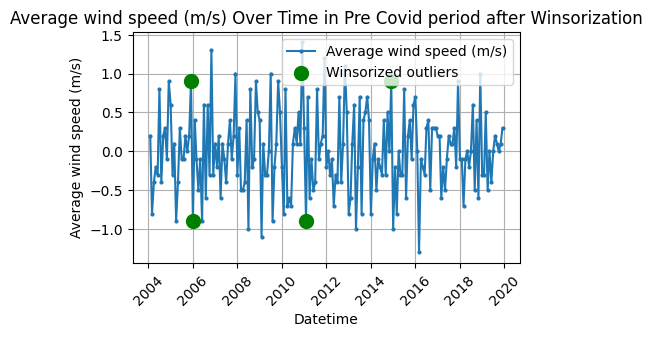

<ipython-input-715-11e9fd1efaca>:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data[var][outlier_indices] = winsorize(data[var], limits=[0.05, 0.05])
<ipython-input-715-11e9fd1efaca>:41: SettingWithCopyWarning: 
A value is trying to be s

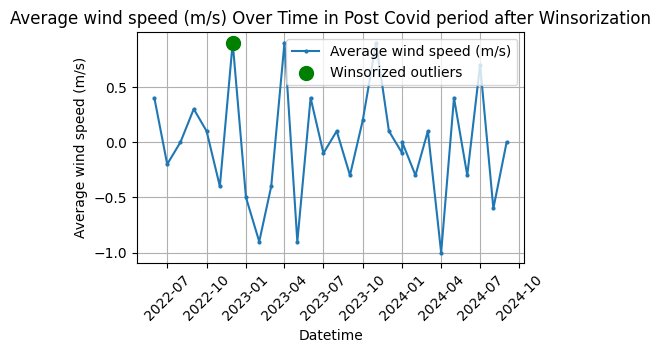

In [ ]:
visualize_outliers(pre_covid_data, 'Average wind speed (m/s)')
visualize_outliers(post_covid_data, 'Average wind speed (m/s)')
winsorize_outliers(pre_covid_data, 'Average wind speed (m/s)')
winsorize_outliers(post_covid_data, 'Average wind speed (m/s)')

## 0.2.6 Normalization

We normalize the data. For the normalization, we consider each dataset seperate from each other.

In [ ]:
# Normalize our variables of interest
from sklearn.preprocessing import MinMaxScaler

# List of datasets to normalize in place
datasets_to_normalize = [data, no_covid_data, covid_data, pre_covid_data, post_covid_data]

for dataset in datasets_to_normalize:
    scaler = MinMaxScaler()

    # Apply MinMaxScaler directly to each column without creating a copy
    dataset['esi'] = scaler.fit_transform(dataset[['esi']])
    dataset['gdp'] = scaler.fit_transform(dataset[['gdp']])
    dataset['gdp_growth'] = scaler.fit_transform(dataset[['gdp_growth']])
    dataset['kr_jp_travel_total'] = scaler.fit_transform(dataset[['kr_jp_travel_total']])
    dataset['kr_jp_travel_tourist'] = scaler.fit_transform(dataset[['kr_jp_travel_tourist']])
    dataset['kr_jp_travel_business'] = scaler.fit_transform(dataset[['kr_jp_travel_business']])
    dataset['kr_jp_travel_others'] = scaler.fit_transform(dataset[['kr_jp_travel_others']])
    dataset['Average temperature (°C)'] = scaler.fit_transform(dataset[['Average temperature (°C)']])
    dataset['Average relative humidity (%)'] = scaler.fit_transform(dataset[['Average relative humidity (%)']])
    dataset['Maximum vapor pressure (hPa)'] = scaler.fit_transform(dataset[['Maximum vapor pressure (hPa)']])
    dataset['Small total evaporation (mm)'] = scaler.fit_transform(dataset[['Small total evaporation (mm)']])
    dataset['Average wind speed (m/s)'] = scaler.fit_transform(dataset[['Average wind speed (m/s)']])


pre_covid_data.head()

passengers  esi  gdp  gdp_growth  kr_jp_travel_total  \
date                                                               
2004-02-01     -34,952    1    0           1                   0   
2004-03-01     -22,391    1    0           1                   0   
2004-04-01     179,597    1    1           1                   1   
2004-05-01     -43,678    0    0           1                   0   
2004-06-01    -133,809    0    0           1                   1   

            kr_jp_travel_tourist  kr_jp_travel_business  kr_jp_travel_others  \
date                                                                           
2004-02-01                     0                      1                    0   
2004-03-01                     0                      1                    1   
2004-04-01                     1                      0                    0   
2004-05-01                     0                      0                    0   
2004-06-01                     1                      1                    0   

            Average temperature (°C)  Average High Temperature (°C)  ...  \
date                                                                 ...   
2004-02-01                         1                             12  ...   
2004-03-01                         1                             14  ...   
2004-04-01                         1                             18  ...   
2004-05-01                         1                             22  ...   
2004-06-01                         1                             25  ...   

            Average temperature (°C)_raw  Average temperature (°C)_diff  \
date                                                                      
2004-02-01                             8                              3   
2004-03-01                            10                              2   
2004-04-01                            14                              4   
2004-05-01                            18                              4   
2004-06-01                            22                              3   

            Average relative humidity (%)_raw  \
date                                            
2004-02-01                                 58   
2004-03-01                                 58   
2004-04-01                                 61   
2004-05-01                                 70   
2004-06-01                                 75   

            Average relative humidity (%)_diff  \
date                                             
2004-02-01                                  -5   
2004-03-01                                   0   
2004-04-01                                   3   
2004-05-01                                   9   
2004-06-01                                   5   

            Maximum vapor pressure (hPa)_raw  \
date                                           
2004-02-01                                17   
2004-03-01                                16   
2004-04-01                                20   
2004-05-01                                24   
2004-06-01                                28   

            Maximum vapor pressure (hPa)_diff  \
date                                            
2004-02-01                                  7   
2004-03-01                                 -1   
2004-04-01                                  4   
2004-05-01                                  5   
2004-06-01                                  4   

            Small total evaporation (mm)_raw  \
date                                           
2004-02-01                                76   
2004-03-01                                96   
2004-04-01                               106   
2004-05-01                               114   
2004-06-01                               123   

            Small total evaporation (mm)_diff  Average wind speed (m/s)_raw  \
date                                                                          
2004-02-01                                 2

**Vizualization after Normalization**

After Normalization, we see that the second outlier in GDP growth rate now falls into the Covid period, meaning, we now take that outlier in account.

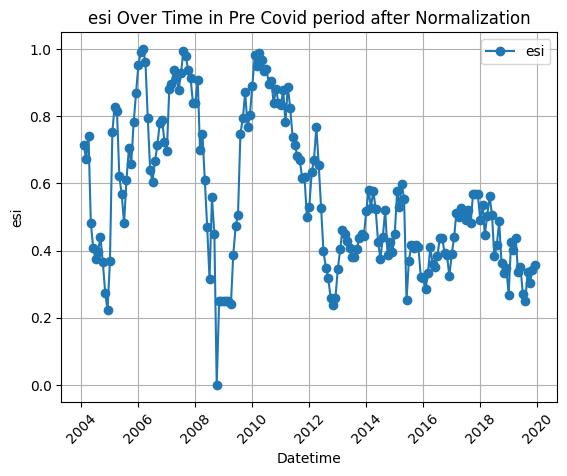

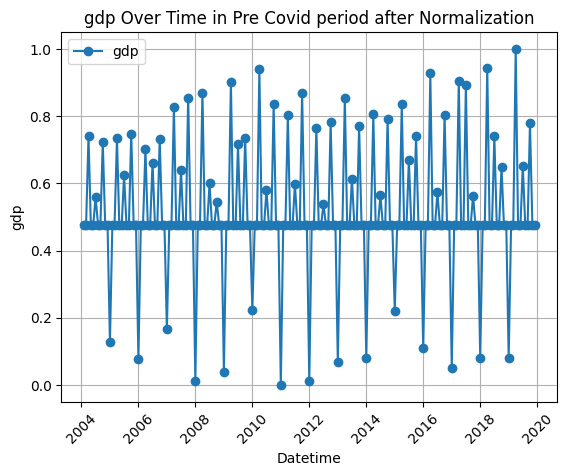

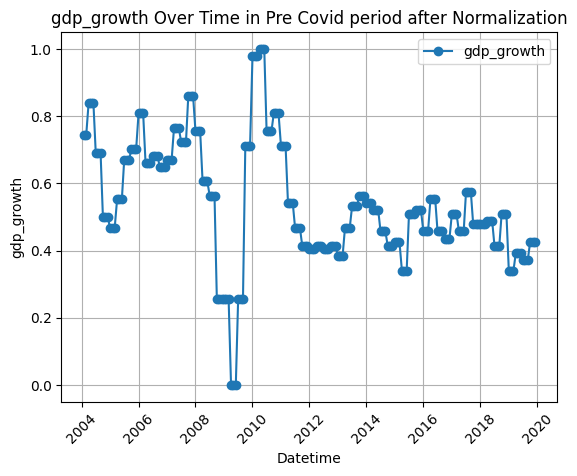

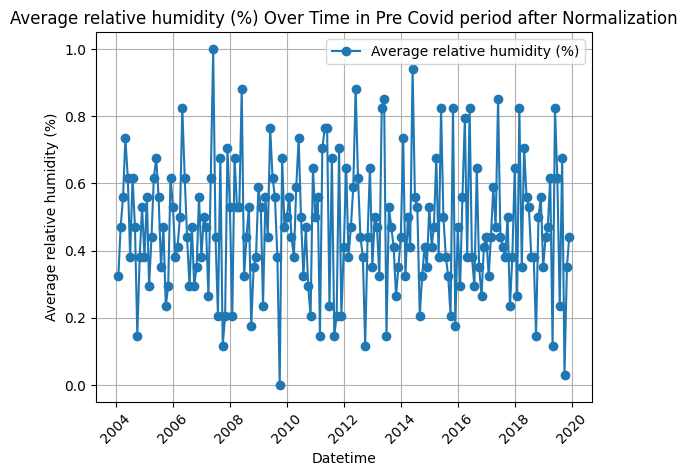

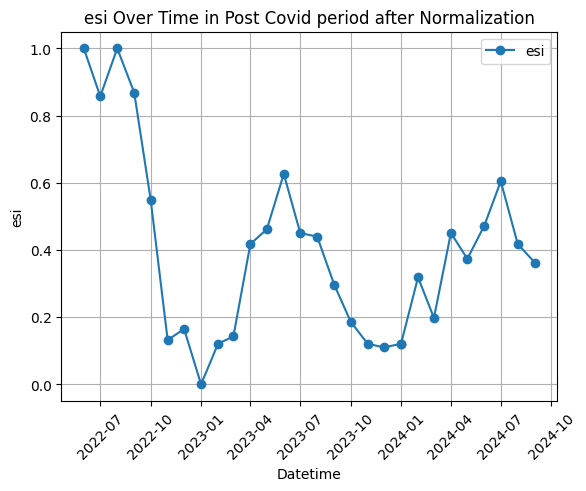

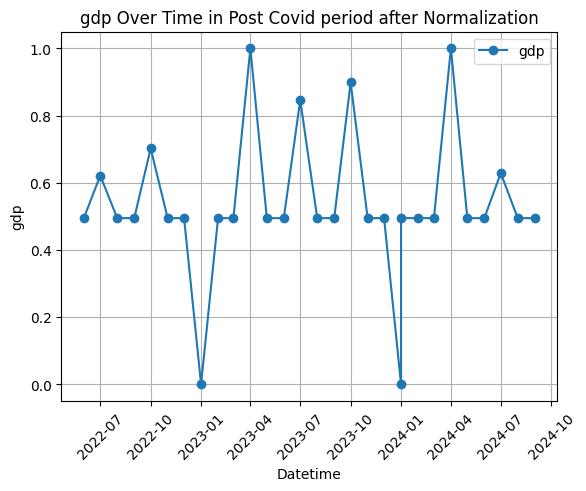

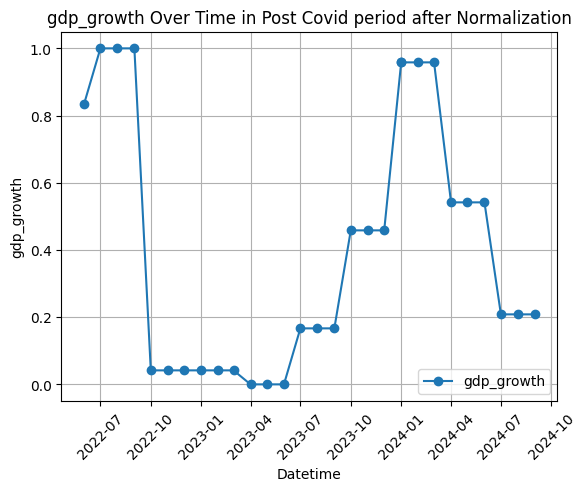

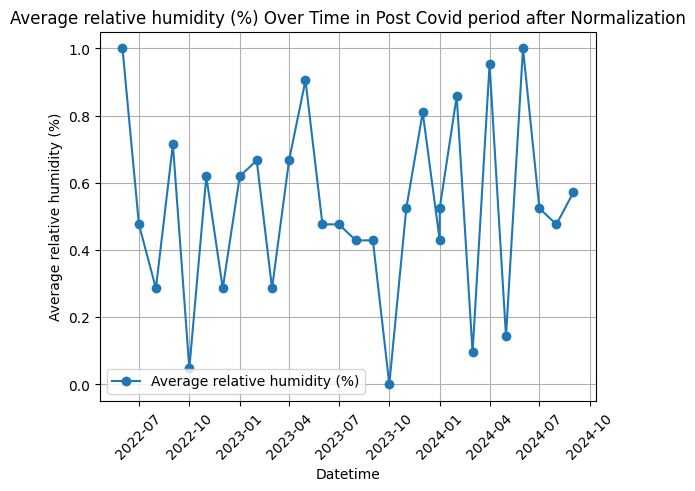

In [ ]:
def visualize_after_normalization(data, var):
    plt.plot(data.index, data[var], marker='o', linestyle='-', label=var)
    plt.title(var + ' Over Time in ' + data.name + ' after Normalization')
    plt.ylabel(var)
    plt.xlabel('Datetime')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

visualize_after_normalization(pre_covid_data, 'esi')
visualize_after_normalization(pre_covid_data, 'gdp')
visualize_after_normalization(pre_covid_data, 'gdp_growth')
visualize_after_normalization(pre_covid_data, 'Average relative humidity (%)')

visualize_after_normalization(post_covid_data, 'esi')
visualize_after_normalization(post_covid_data, 'gdp')
visualize_after_normalization(post_covid_data, 'gdp_growth')
visualize_after_normalization(post_covid_data, 'Average relative humidity (%)')

## 0.2.7 Adding lagged variables

We add lagged economic variables to account for economic situation when booking flights, which can be more in advanced.

The first missing values are filled with the first available observation.

In [ ]:
for dataset in datasets_to_normalize:
    dataset['gdp_lag_1m'] = dataset['gdp'].shift(1)
    dataset['gdp_lag_1m'] = dataset['gdp_lag_1m'].fillna(dataset['gdp'][0])
    dataset['gdp_lag_2m'] = dataset['gdp'].shift(2)
    dataset['gdp_lag_2m'] = dataset['gdp_lag_2m'].fillna(dataset['gdp'][0])
    dataset['gdp_lag_3m'] = dataset['gdp'].shift(3)
    dataset['gdp_lag_3m'] = dataset['gdp_lag_3m'].fillna(dataset['gdp'][0])
    dataset['gdp_lag_4m'] = dataset['gdp'].shift(4)
    dataset['gdp_lag_4m'] = dataset['gdp_lag_4m'].fillna(dataset['gdp'][0])
    dataset['gdp_lag_5m'] = dataset['gdp'].shift(5)
    dataset['gdp_lag_5m'] = dataset['gdp_lag_5m'].fillna(dataset['gdp'][0])
    dataset['gdp_lag_6m'] = dataset['gdp'].shift(6)
    dataset['gdp_lag_6m'] = dataset['gdp_lag_6m'].fillna(dataset['gdp'][0])

    dataset['gdp_raw_lag_1m'] = dataset['gdp_raw'].shift(1)
    dataset['gdp_raw_lag_1m'] = dataset['gdp_raw_lag_1m'].fillna(dataset['gdp_raw'][0])
    dataset['gdp_raw_lag_2m'] = dataset['gdp_raw'].shift(2)
    dataset['gdp_raw_lag_2m'] = dataset['gdp_raw_lag_2m'].fillna(dataset['gdp_raw'][0])
    dataset['gdp_raw_lag_3m'] = dataset['gdp_raw'].shift(3)
    dataset['gdp_raw_lag_3m'] = dataset['gdp_raw_lag_3m'].fillna(dataset['gdp_raw'][0])
    dataset['gdp_raw_lag_4m'] = dataset['gdp_raw'].shift(4)
    dataset['gdp_raw_lag_4m'] = dataset['gdp_raw_lag_4m'].fillna(dataset['gdp_raw'][0])
    dataset['gdp_raw_lag_5m'] = dataset['gdp_raw'].shift(5)
    dataset['gdp_raw_lag_5m'] = dataset['gdp_raw_lag_5m'].fillna(dataset['gdp_raw'][0])
    dataset['gdp_raw_lag_6m'] = dataset['gdp_raw'].shift(6)
    dataset['gdp_raw_lag_6m'] = dataset['gdp_raw_lag_6m'].fillna(dataset['gdp_raw'][0])

    dataset['gdp_growth_lag_1m'] = dataset['gdp_growth'].shift(1)
    dataset['gdp_growth_lag_1m'] = dataset['gdp_growth_lag_1m'].fillna(dataset['gdp_growth'][0])
    dataset['gdp_growth_lag_2m'] = dataset['gdp_growth'].shift(2)
    dataset['gdp_growth_lag_2m'] = dataset['gdp_growth_lag_2m'].fillna(dataset['gdp_growth'][0])
    dataset['gdp_growth_lag_3m'] = dataset['gdp_growth'].shift(3)
    dataset['gdp_growth_lag_3m'] = dataset['gdp_growth_lag_3m'].fillna(dataset['gdp_growth'][0])
    dataset['gdp_growth_lag_4m'] = dataset['gdp_growth'].shift(4)
    dataset['gdp_growth_lag_4m'] = dataset['gdp_growth_lag_4m'].fillna(dataset['gdp_growth'][0])
    dataset['gdp_growth_lag_5m'] = dataset['gdp_growth'].shift(5)
    dataset['gdp_growth_lag_5m'] = dataset['gdp_growth_lag_5m'].fillna(dataset['gdp_growth'][0])
    dataset['gdp_growth_lag_6m'] = dataset['gdp_growth'].shift(6)
    dataset['gdp_growth_lag_6m'] = dataset['gdp_growth_lag_6m'].fillna(dataset['gdp_growth'][0])

    dataset['esi_lag_1m'] = dataset['esi'].shift(1)
    dataset['esi_lag_1m'] = dataset['esi_lag_1m'].fillna(dataset['esi'][0])
    dataset['esi_lag_2m'] = dataset['esi'].shift(2)
    dataset['esi_lag_2m'] = dataset['esi_lag_2m'].fillna(dataset['esi'][0])
    dataset['esi_lag_3m'] = dataset['esi'].shift(3)
    dataset['esi_lag_3m'] = dataset['esi_lag_3m'].fillna(dataset['esi'][0])
    dataset['esi_lag_4m'] = dataset['esi'].shift(4)
    dataset['esi_lag_4m'] = dataset['esi_lag_4m'].fillna(dataset['esi'][0])
    dataset['esi_lag_5m'] = dataset['esi'].shift(5)
    dataset['esi_lag_5m'] = dataset['esi_lag_5m'].fillna(dataset['esi'][0])
    dataset['esi_lag_6m'] = dataset['esi'].shift(6)
    dataset['esi_lag_6m'] = dataset['esi_lag_6m'].fillna(dataset['esi'][0])



pre_covid_data.head()

<ipython-input-731-5d9e15ee58dd>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset['gdp_lag_1m'] = dataset['gdp_lag_1m'].fillna(dataset['gdp'][0])
<ipython-input-731-5d9e15ee58dd>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset['gdp_lag_2m'] = dataset['gdp_lag_2m'].fillna(dataset['gdp'][0])
<ipython-input-731-5d9e15ee58dd>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset['gdp_lag_3m'] = dataset['gdp_lag_3m'].

passengers  esi  gdp  gdp_growth  kr_jp_travel_total  \
date                                                               
2004-02-01     -34,952    1    0           1                   0   
2004-03-01     -22,391    1    0           1                   0   
2004-04-01     179,597    1    1           1                   1   
2004-05-01     -43,678    0    0           1                   0   
2004-06-01    -133,809    0    0           1                   1   

            kr_jp_travel_tourist  kr_jp_travel_business  kr_jp_travel_others  \
date                                                                           
2004-02-01                     0                      1                    0   
2004-03-01                     0                      1                    1   
2004-04-01                     1                      0                    0   
2004-05-01                     0                      0                    0   
2004-06-01                     1                      1                    0   

            Average temperature (°C)  Average High Temperature (°C)  ...  \
date                                                                 ...   
2004-02-01                         1                             12  ...   
2004-03-01                         1                             14  ...   
2004-04-01                         1                             18  ...   
2004-05-01                         1                             22  ...   
2004-06-01                         1                             25  ...   

            gdp_growth_lag_3m  gdp_growth_lag_4m  gdp_growth_lag_5m  \
date                                                                  
2004-02-01                  1                  1                  1   
2004-03-01                  1                  1                  1   
2004-04-01                  1                  1                  1   
2004-05-01                  1                  1                  1   
2004-06-01                  1                  1                  1   

            gdp_growth_lag_6m  esi_lag_1m  esi_lag_2m  esi_lag_3m  esi_lag_4m  \
date                                                                            
2004-02-01                  1           1           1           1           1   
2004-03-01                  1           1           1           1           1   
2004-04-01                  1           1           1           1           1   
2004-05-01                  1           1           1           1           1   
2004-06-01                  1           0           1           1           1   

            esi_lag_5m  esi_lag_6m  
date                                
2004-02-01           1           1  
2004-03-01           1           1  
2004-04-01           1           1  
2004-05-01           1           1  
2004-06-01           1           1  

[5 rows x 106 columns]

## 0.2.8 Exporting CVS Files

In [ ]:
# Export datasets to CSV
data.to_csv(export_cvs_path + 'data.csv', index=True)
no_covid_data.to_csv(export_cvs_path + 'no_covid_data.csv', index=True)
covid_data.to_csv(export_cvs_path + 'covid_data.csv', index=True)
pre_covid_data.to_csv(export_cvs_path + 'pre_covid_data.csv', index=True)
post_covid_data.to_csv(export_cvs_path + 'post_covid_data.csv', index=True)

# **1.0 Modelling**

## Deciding Vars

In [ ]:
possible_vars = ['Average temperature (°C)',
                 'Average relative humidity (%)',
                 'esi',
                 'kr_jp_travel_total',
                 'esi_lag_1m',
                 'esi_lag_2m',
                 'esi_lag_3m',
                 'esi_lag_4m',
                 'esi_lag_5m',
                 'esi_lag_6m',
                 'gdp_growth_lag_1m',
                 'gdp_growth_lag_2m',
                 'gdp_growth_lag_3m',
                 'gdp_growth_lag_4m',
                 'gdp_growth_lag_5m',
                 'gdp_growth_lag_6m',
                 'gdp_lag_1m',
                 'gdp_lag_2m',
                 'gdp_lag_3m',
                 'gdp_lag_4m',
                 'gdp_lag_5m',
                 'gdp_lag_6m',
                 'gdp_raw_lag_1m',
                 'gdp_raw_lag_2m',
                 'gdp_raw_lag_3m',
                 'gdp_raw_lag_4m',
                 'gdp_raw_lag_5m',
                 'gdp_raw_lag_6m',
                 'big_holiday']


for var in possible_vars:
    print("\nGranger Causality Test:", var)
    granger_test_1a = grangercausalitytests(data[['passengers', var]], maxlag=1)
    print("=====================================================================================")

exog_vars = ['Average temperature (°C)',
             'Average relative humidity (%)',
             'kr_jp_travel_total',
             'gdp_lag_2m',
             'big_holiday']


Granger Causality Test: Average temperature (°C)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.5887 , p=0.0005  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=12.7428 , p=0.0004  , df=1
likelihood ratio test: chi2=12.4263 , p=0.0004  , df=1
parameter F test:         F=12.5887 , p=0.0005  , df_denom=245, df_num=1

Granger Causality Test: Average relative humidity (%)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.9013  , p=0.0494  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=3.9491  , p=0.0469  , df=1
likelihood ratio test: chi2=3.9180  , p=0.0478  , df=1
parameter F test:         F=3.9013  , p=0.0494  , df_denom=245, df_num=1

Granger Causality Test: esi

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4240  , p=0.5155  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.4292  , p=0.5124  , df=1
likelihood ratio test: chi2=0.4289  , p=0.5125  , df=1
parameter F test:         F=0.424

# SARIMAX

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.graphics.tsaplots import plot_ccf
from sklearn.model_selection import train_test_split
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ValueWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels.tsa.statespace.sarimax")

In [ ]:
# Define training and test data

pre_covid_train = pre_covid_data.loc['2004-01':'2018-12']
pre_covid_test = pre_covid_data.loc['2019-01':'2019-12']

pre_covid_train_exog = pre_covid_train[exog_vars]
pre_covid_test_exog = pre_covid_test[exog_vars]

## Pre Covid

In [ ]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
seasonal_periods = [12]

# DataFrame to store results
results = []

# Grid search over SARIMAX parameters with multiple seasonal periods
for param in pdq:
    for seasonal_m in seasonal_periods:
        seasonal_pdq = [(x[0], x[1], x[2], seasonal_m) for x in itertools.product(P, D, Q)]
        for seasonal_param in seasonal_pdq:
            try:
                # Fit SARIMAX model with exogenous variable(s) (e.g., exog=train_exog)
                temp_model = SARIMAX(pre_covid_train['passengers'],
                                     order=param,
                                     seasonal_order=seasonal_param,
                                     exog=pre_covid_train_exog)
                temp_result = temp_model.fit(disp=False)  # disp=False suppresses output

                # Store parameters and AIC
                results.append([param, seasonal_param, temp_result.aic])
            except Exception as e:
                continue

# Convert results to DataFrame and sort by AIC
results_df = pd.DataFrame(results, columns=['SARIMAX parameters', 'Seasonal parameters', 'AIC'])
results_df = results_df.sort_values(by='AIC').reset_index(drop=True)

print("Optimal SARIMAX parameters and AIC values:")
print(results_df)

Optimal SARIMAX parameters and AIC values:
   SARIMAX parameters Seasonal parameters   AIC
0           (0, 0, 0)       (1, 1, 1, 12) 4,068
1           (0, 0, 0)       (0, 1, 1, 12) 4,068
2           (0, 0, 1)       (0, 1, 1, 12) 4,068
3           (1, 0, 0)       (0, 1, 1, 12) 4,068
4           (0, 0, 1)       (1, 1, 1, 12) 4,070
..                ...                 ...   ...
59          (1, 1, 0)       (0, 0, 0, 12) 4,628
60          (0, 0, 0)       (0, 1, 0, 12) 4,776
61          (0, 1, 0)       (0, 1, 0, 12) 4,876
62          (0, 0, 0)       (0, 0, 0, 12) 5,289
63          (0, 1, 0)       (0, 0, 0, 12) 5,407

[64 rows x 3 columns]


In [ ]:
# Define the SARIMAX parameters
order = (0, 0, 0)
seasonal_order = (1, 1, 1, 12)

In [ ]:
from re import S

pre_covid_sarimax = SARIMAX(pre_covid_train['passengers'], order=order, seasonal_order=seasonal_order, exog=pre_covid_train_exog)
pre_covid_sarimax_fit = pre_covid_sarimax.fit()

print(pre_covid_sarimax_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:                 passengers   No. Observations:                  179
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood               -2025.841
Date:                    Wed, 18 Dec 2024   AIC                           4067.682
Time:                            13:47:15   BIC                           4092.626
Sample:                        02-01-2004   HQIC                          4077.806
                             - 12-01-2018                                         
Covariance Type:                      opg                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Average temperature (°C)       1831.1964   3.82e+04      0.048      0.962    -7.3e+04    7.67e+04
Average relative humidity (%)  -2.66e+04  

In [ ]:
forecast_steps = len(pre_covid_test)
pre_covid_sarimax_forecast = pre_covid_sarimax_fit.get_forecast(steps=forecast_steps, exog=pre_covid_test_exog)
pre_covid_sarimax_forecast_mean = pre_covid_sarimax_forecast.predicted_mean
pre_covid_sarimax_conf_int = pre_covid_sarimax_forecast.conf_int()

In [ ]:
# Calculate MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(pre_covid_test['passengers'], pre_covid_sarimax_forecast_mean)
mse = mean_squared_error(pre_covid_test['passengers'], pre_covid_sarimax_forecast_mean)

print("Mean Absolute Error (MAE):", "\n", round(mae, 2))
print("Mean Squared Error (MSE):", "\n", round(mse, 2))

Mean Absolute Error (MAE): 
 68044.29
Mean Squared Error (MSE): 
 8356246836.22


In [ ]:
def inverse_differencing(differenced, initial_value):
    original = [initial_value]
    differenced = np.ravel(differenced)
    for diff in differenced:
        original.append(original[-1] + diff)
    return np.array(original)

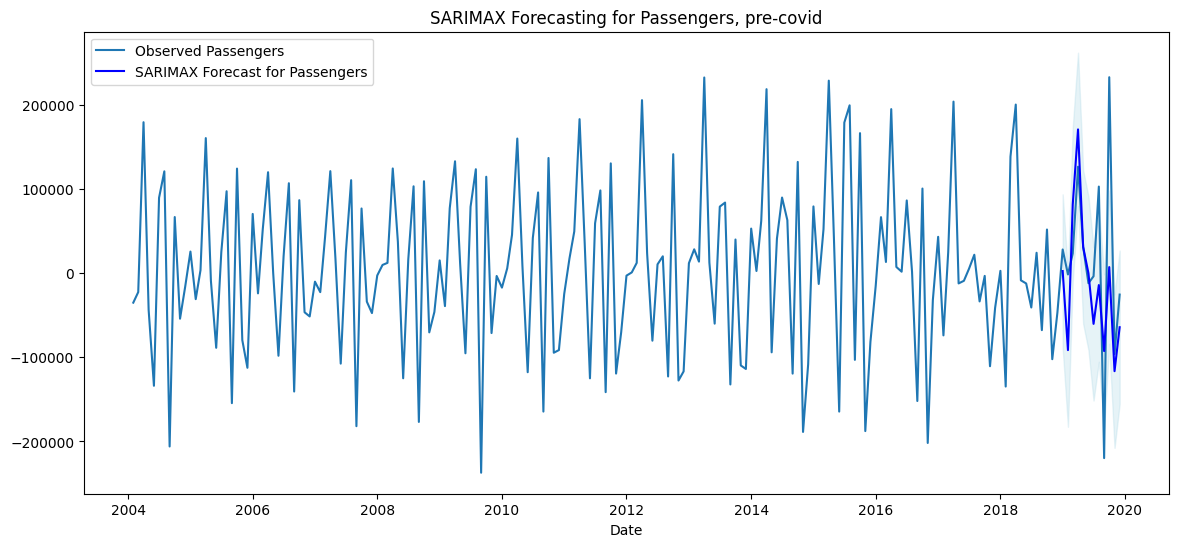

In [ ]:
# Plot SARIMAX forecast
plt.figure(figsize=(14, 6))
plt.plot(pre_covid_data['passengers'], label='Observed Passengers')
plt.plot(pre_covid_sarimax_forecast_mean, color='blue', label='SARIMAX Forecast for Passengers')
plt.fill_between(pre_covid_sarimax_conf_int.index,
                 pre_covid_sarimax_conf_int.iloc[:, 0],
                 pre_covid_sarimax_conf_int.iloc[:, 1], color='lightblue', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecasting for Passengers, pre-covid')
plt.xlabel('Date')
plt.show()

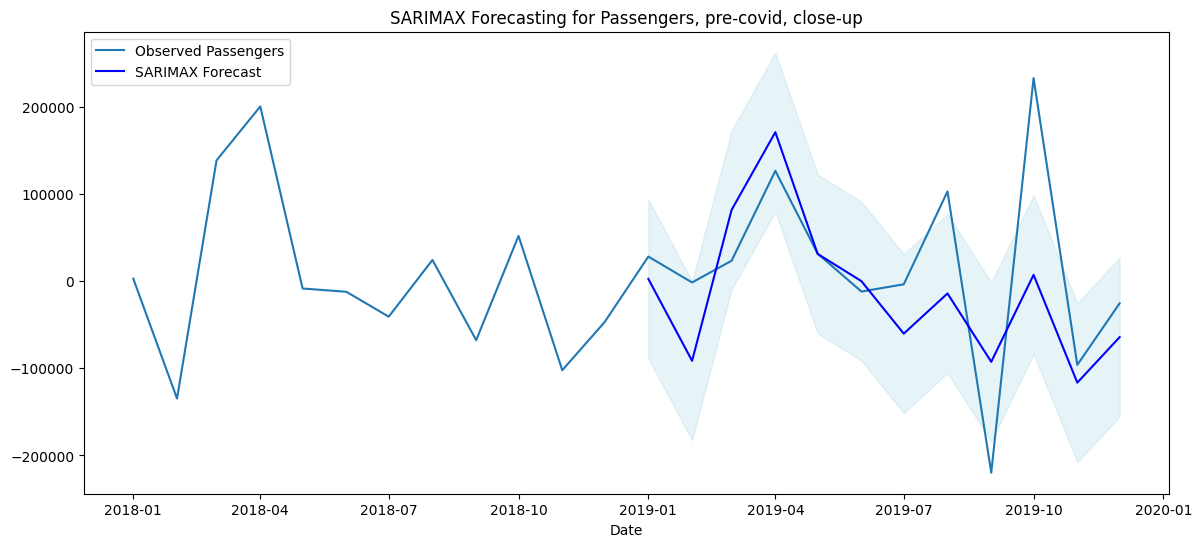

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(pre_covid_data['passengers']['2018':], label='Observed Passengers')
plt.plot(pre_covid_sarimax_forecast_mean, color='blue', label='SARIMAX Forecast')
plt.fill_between(pre_covid_sarimax_conf_int.index,
                 pre_covid_sarimax_conf_int.iloc[:, 0],
                 pre_covid_sarimax_conf_int.iloc[:, 1], color='lightblue', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecasting for Passengers, pre-covid, close-up')
plt.xlabel('Date')
plt.show()

In [ ]:
def inverse_differencing(differenced, initial_value):
    original = [initial_value]
    differenced = np.ravel(differenced)
    for diff in differenced:
        original.append(original[-1] + diff)
    return np.array(original)

pre_differenced_data = pre_covid_sarimax_forecast_mean
pre_covid_data_reconstructed_data = inverse_differencing(pre_differenced_data, 1140996)
#pre_reconstructed_prediction = inverse_differencing(pre_reshaped_predictions,1140996)

print(pre_differenced_data)
print(pre_covid_data_reconstructed_data)

2019-01-01      2,625
2019-02-01    -91,386
2019-03-01     81,822
2019-04-01    171,040
2019-05-01     31,271
2019-06-01         70
2019-07-01    -60,167
2019-08-01    -14,062
2019-09-01    -92,541
2019-10-01      7,328
2019-11-01   -116,433
2019-12-01    -64,176
Freq: MS, Name: predicted_mean, dtype: float64
[1140996.         1143621.19560909 1052235.5613602  1134057.08772542
 1305097.3812533  1336368.65488834 1336438.25741003 1276270.9520547
 1262208.5715073  1169667.41128867 1176995.22420353 1060562.25144124
  996385.99947421]


## Post-covid

In [ ]:
post_covid_train = post_covid_data.loc['2022-06':'2023-09']
post_covid_test = post_covid_data.loc['2023-10':'2024-09']

post_covid_train_exog = post_covid_train[exog_vars]
post_covid_test_exog = post_covid_test[exog_vars]

In [ ]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
seasonal_periods = [12]

# DataFrame to store results
results = []

# Grid search over SARIMAX parameters with multiple seasonal periods
for param in pdq:
    for seasonal_m in seasonal_periods:
        seasonal_pdq = [(x[0], x[1], x[2], seasonal_m) for x in itertools.product(P, D, Q)]
        for seasonal_param in seasonal_pdq:
            try:
                # Fit SARIMAX model with exogenous variable(s) (e.g., exog=train_exog)
                temp_model = SARIMAX(post_covid_train['passengers'],
                                     order=param,
                                     seasonal_order=seasonal_param,
                                     exog=post_covid_train_exog)
                temp_result = temp_model.fit(disp=False)  # disp=False suppresses output

                # Store parameters and AIC
                results.append([param, seasonal_param, temp_result.aic])
            except Exception as e:
                continue

# Convert results to DataFrame and sort by AIC
results_df = pd.DataFrame(results, columns=['SARIMAX parameters', 'Seasonal parameters', 'AIC'])
results_df = results_df.sort_values(by='AIC').reset_index(drop=True)

print("Optimal SARIMAX parameters and AIC values:")
print(results_df)

Optimal SARIMAX parameters and AIC values:
   SARIMAX parameters Seasonal parameters  AIC
0           (0, 0, 0)       (0, 1, 0, 12)  -69
1           (1, 0, 0)       (0, 1, 0, 12)  -68
2           (0, 0, 0)       (0, 1, 1, 12)  -67
3           (0, 0, 0)       (1, 1, 0, 12)  -67
4           (0, 0, 1)       (0, 1, 0, 12)  -67
..                ...                 ...  ...
59          (0, 0, 0)       (1, 0, 1, 12)  416
60          (1, 0, 0)       (1, 0, 1, 12)  417
61          (1, 0, 1)       (1, 0, 1, 12)  418
62          (0, 1, 0)       (0, 0, 0, 12)  429
63          (0, 0, 0)       (0, 0, 0, 12)  443

[64 rows x 3 columns]


In [ ]:
# Define the SARIMAX parameters
order = (0, 0, 0)
seasonal_order = (0, 1, 0, 12)

In [ ]:

post_covid_sarimax = SARIMAX(post_covid_train['passengers'], order=order, seasonal_order=seasonal_order, exog=post_covid_train_exog)
post_covid_sarimax_fit = post_covid_sarimax.fit()

print(post_covid_sarimax_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:               passengers   No. Observations:                   16
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                  40.686
Date:                  Wed, 18 Dec 2024   AIC                            -69.371
Time:                          13:47:46   BIC                            -73.054
Sample:                      06-01-2022   HQIC                           -77.452
                           - 09-01-2023                                         
Covariance Type:                    opg                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Average temperature (°C)       6.672e+05      0.007   9.78e+07      0.000    6.67e+05    6.67e+05
Average relative humidity (%)   3.85e+05      0.014   2.82

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3160: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3160: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


In [ ]:
forecast_steps = len(post_covid_test)
post_covid_sarimax_forecast = post_covid_sarimax_fit.get_forecast(steps=forecast_steps, exog=post_covid_test_exog)
post_covid_sarimax_forecast_mean = post_covid_sarimax_forecast.predicted_mean
post_covid_sarimax_conf_int = post_covid_sarimax_forecast.conf_int()

In [ ]:
# Calculate MAE and MSE
mae = mean_absolute_error(post_covid_test['passengers'], post_covid_sarimax_forecast_mean)
mse = mean_squared_error(post_covid_test['passengers'], post_covid_sarimax_forecast_mean)

print("Mean Absolute Error (MAE):","\n", round(mae, 2))
print("Mean Squared Error (MSE):", "\n", round(mse, 2))

Mean Absolute Error (MAE): 
 247377.6
Mean Squared Error (MSE): 
 98031914049.2


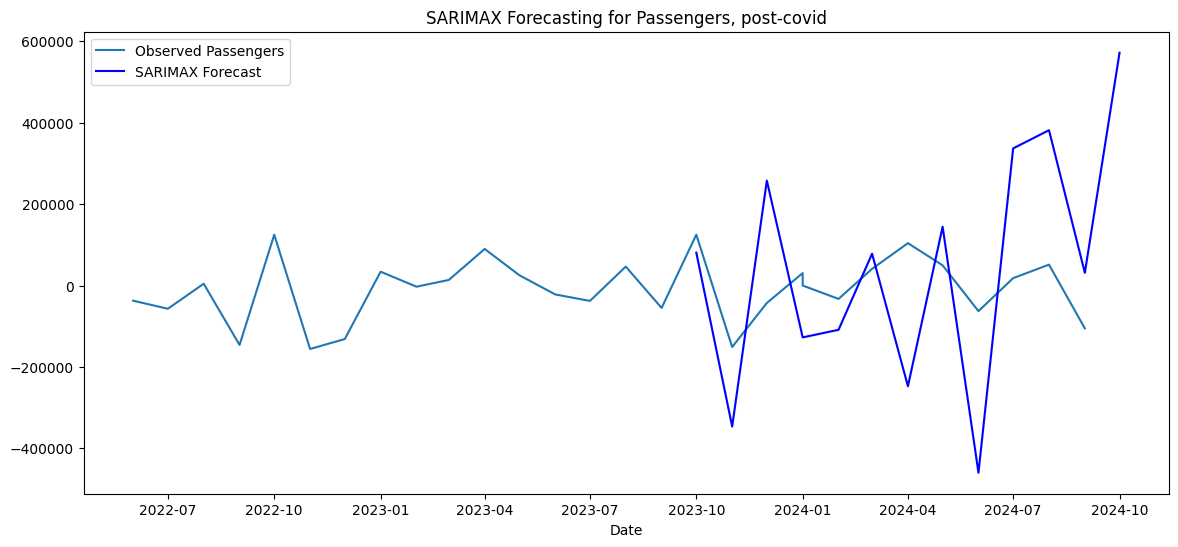

In [ ]:
# Plot SARIMAX forecast
plt.figure(figsize=(14, 6))
plt.plot(post_covid_data['passengers'], label='Observed Passengers')
plt.plot(post_covid_sarimax_forecast_mean, color='blue', label='SARIMAX Forecast')
plt.fill_between(post_covid_sarimax_conf_int.index,
                 post_covid_sarimax_conf_int.iloc[:, 0],
                 post_covid_sarimax_conf_int.iloc[:, 1], color='lightblue', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecasting for Passengers, post-covid')
plt.xlabel('Date')
plt.show()

## Using covid as exog_var

In [ ]:
train_data = data.loc['2004-01':'2022-09']
test_data = data.loc['2022-10':'2024-09']

exog_vars = ['Average temperature (°C)',
             'Average relative humidity (%)',
             'kr_jp_travel_total',
             'gdp_lag_2m',
             'big_holiday',
             'covid19_period',
             'post_covid19_period']


train_exog = train_data[exog_vars]
test_exog = test_data[exog_vars]


In [ ]:
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))

P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
seasonal_periods = [12]

# DataFrame to store results
results = []

# Grid search over SARIMAX parameters with multiple seasonal periods
for param in pdq:
    for seasonal_m in seasonal_periods:
        seasonal_pdq = [(x[0], x[1], x[2], seasonal_m) for x in itertools.product(P, D, Q)]
        for seasonal_param in seasonal_pdq:
            try:
                # Fit SARIMAX model with exogenous variable(s) (e.g., exog=train_exog)
                temp_model = SARIMAX(train_data['passengers'],
                                     order=param,
                                     seasonal_order=seasonal_param,
                                     exog=train_exog)
                temp_result = temp_model.fit(disp=False)  # disp=False suppresses output

                # Store parameters and AIC
                results.append([param, seasonal_param, temp_result.aic])
            except Exception as e:
                continue

# Convert results to DataFrame and sort by AIC
results_df = pd.DataFrame(results, columns=['SARIMAX parameters', 'Seasonal parameters', 'AIC'])
results_df = results_df.sort_values(by='AIC').reset_index(drop=True)

print("Optimal SARIMAX parameters and AIC values:")
print(results_df)

Optimal SARIMAX parameters and AIC values:
   SARIMAX parameters Seasonal parameters   AIC
0           (1, 0, 1)       (0, 1, 1, 12) 5,525
1           (1, 0, 1)       (1, 1, 1, 12) 5,527
2           (1, 0, 1)       (1, 1, 0, 12) 5,528
3           (0, 0, 0)       (0, 1, 1, 12) 5,531
4           (0, 0, 1)       (0, 1, 1, 12) 5,531
..                ...                 ...   ...
59          (0, 1, 0)       (0, 0, 1, 12) 5,963
60          (0, 0, 0)       (0, 1, 0, 12) 6,488
61          (0, 1, 0)       (0, 1, 0, 12) 6,592
62          (0, 0, 0)       (0, 0, 0, 12) 6,828
63          (0, 1, 0)       (0, 0, 0, 12) 6,957

[64 rows x 3 columns]


In [ ]:
# Define the SARIMAX parameters
order = (1, 0, 1)
seasonal_order = (0, 1, 1, 12)

In [ ]:

total_sarimax = SARIMAX(train_data['passengers'], order=order, seasonal_order=seasonal_order, exog=train_exog)
total_sarimax_fit = total_sarimax.fit()

print(total_sarimax_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         passengers   No. Observations:                  224
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -2752.474
Date:                            Wed, 18 Dec 2024   AIC                           5524.947
Time:                                    13:48:42   BIC                           5558.513
Sample:                                02-01-2004   HQIC                          5538.514
                                     - 09-01-2022                                         
Covariance Type:                              opg                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Average temperature (°C)       1.846e+05   8.43e+04      2.190      0.029   

In [ ]:
forecast_steps = len(test_data)
total_sarimax_forecast = total_sarimax_fit.get_forecast(steps=forecast_steps, exog=test_exog)
total_sarimax_forecast_mean = total_sarimax_forecast.predicted_mean
total_sarimax_conf_int = total_sarimax_forecast.conf_int()

In [ ]:
# Calculate MAE and MSE
mae = mean_absolute_error(test_data['passengers'], total_sarimax_forecast_mean)
mse = mean_squared_error(test_data['passengers'], total_sarimax_forecast_mean)

print("Mean Absolute Error (MAE):", "\n", round(mae, 2))
print("Mean Squared Error (MSE):", "\n", round(mse, 2))

Mean Absolute Error (MAE): 
 112438.88
Mean Squared Error (MSE): 
 25123532127.27


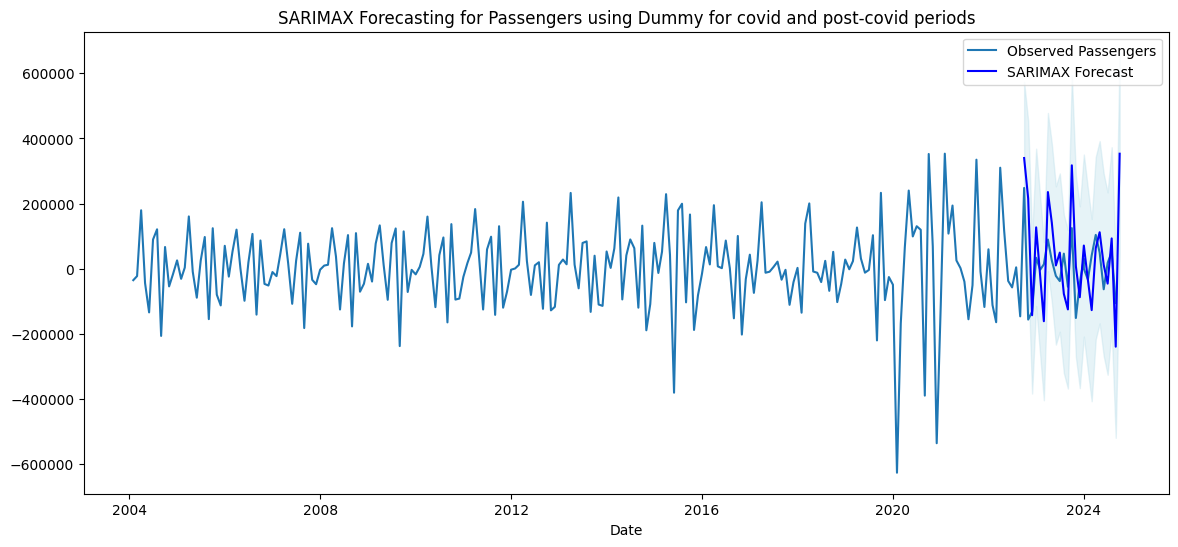

In [ ]:
# Plot SARIMAX forecast
plt.figure(figsize=(14, 6))
plt.plot(data['passengers'], label='Observed Passengers')
plt.plot(total_sarimax_forecast_mean, color='blue', label='SARIMAX Forecast')
plt.fill_between(total_sarimax_conf_int.index,
                 total_sarimax_conf_int.iloc[:, 0],
                 total_sarimax_conf_int.iloc[:, 1], color='lightblue', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecasting for Passengers using Dummy for covid and post-covid periods')
plt.xlabel('Date')
plt.show()

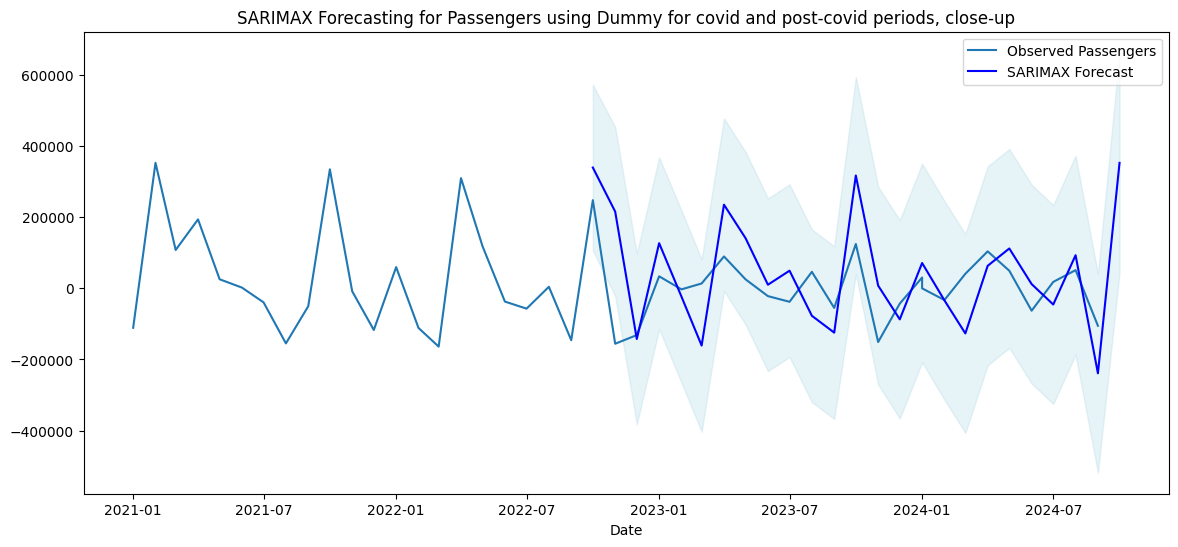

In [ ]:
# Plot SARIMAX forecast
plt.figure(figsize=(14, 6))
plt.plot(data['passengers']['2021':], label='Observed Passengers')
plt.plot(total_sarimax_forecast_mean, color='blue', label='SARIMAX Forecast')
plt.fill_between(total_sarimax_conf_int.index,
                 total_sarimax_conf_int.iloc[:, 0],
                 total_sarimax_conf_int.iloc[:, 1], color='lightblue', alpha=0.3)
plt.legend()
plt.title('SARIMAX Forecasting for Passengers using Dummy for covid and post-covid periods, close-up')
plt.xlabel('Date')
plt.show()